# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%

# Goal

- To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.
- To adjust to if the company's requirement changes in the future so need to handle these as well.

## Steps to Follow:

1. Read and understand the data
2. Clean the data
3. Prepare the data for Model Building
4. Model Building
5. Model Evaluation
6. Making Predictions on the Test Set



## Import Libraries

In [1]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the NumPy and Pandas packages

import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

#import miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

# Step 1:  Read and Understand the data

In [3]:
# Read the dataframe leads
leads_df = pd.read_csv("Leads.csv")
leads_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
##Checking the Shape of dataframe
leads_df.shape

(9240, 37)

In [5]:
## Checking the information of the dataframe
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
## Describe the dataframe
leads_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [7]:
# Inspecting the different columns in the dataset
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

# Step 2: Data Checking and Cleaning 

In [8]:
# Checking datatype of columns
leads_df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

we can total 7 numeric columns and 30 categorical columns and none of the columns have inconsistent datatype, hence no conversion is required.

In [9]:
# Checking for duplicates and dropping the entire duplicate row if any:-
leads_df.drop_duplicates(subset=None, inplace=True)

In [10]:
##checking shape of the datafram leads 
leads_df.shape

(9240, 37)

We can see the shape of the dataframe which is same before and after dropping duplicate,so there is no duplicate values.


In [11]:
#Finding COlumns with Select Values

In [12]:
# Finding column names in which 'Select' level is available:-

cols=list(leads_df.columns)
for i in cols:
    if 'Select' in leads_df[i].values:
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


In [13]:
#Converting 'Select' values to NaN.

leads_df = leads_df.replace('Select', np.nan)

### Checking and Handling Missing Values

In [14]:
# Checking the number of missing values in each column
leads_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [15]:
#checking percentage of null values in each column
round(100*(leads_df.isnull().sum()/len(leads_df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

As we can see there are a lot of column which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 45% missing values as they are of no use to us.

In [16]:
#dropping cols with more than 45% missing values
cols = leads_df.columns

for col in cols:
    if (100 * (leads_df[col].isnull().sum() / len(leads_df.index))) >= 45:
        leads_df.drop(col, axis=1, inplace=True)


In [17]:
# Again checking null values percentage

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### Observations:
-->Below are the columns with 45% or more missing values, which are typically assigned by the sales team after calls:
1. Asymmetrique Activity Index
2. Asymmetrique Profile Index
3. Asymmetrique Activity Score
4. Asymmetrique Profile Score
5. How did you hear about X Education
6. Lead Profile
-->Additionally, the following columns are created by the sales team after contacting the leads so we can drop these columns.
1. Lead Quality
2. Tags
3. Asymmetrique scores
4. Profile
5. Last Notable Activity
For rest of the columns we will do analysis wheather we will drop it or not.


Here Prospect ID & Lead Number are two variables that are just shows the ID number of the approched People so they can be dropped.

In [18]:
# Dropping the columns "Prospect ID" and "Lead Number"
leads_df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [19]:
leads_df.shape

(9240, 28)

# Missing Values Treatment

### Categorical variables

Checking the missing values less than 45% and Handling them.

In [20]:
#checking value counts of Country column

leads_df['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

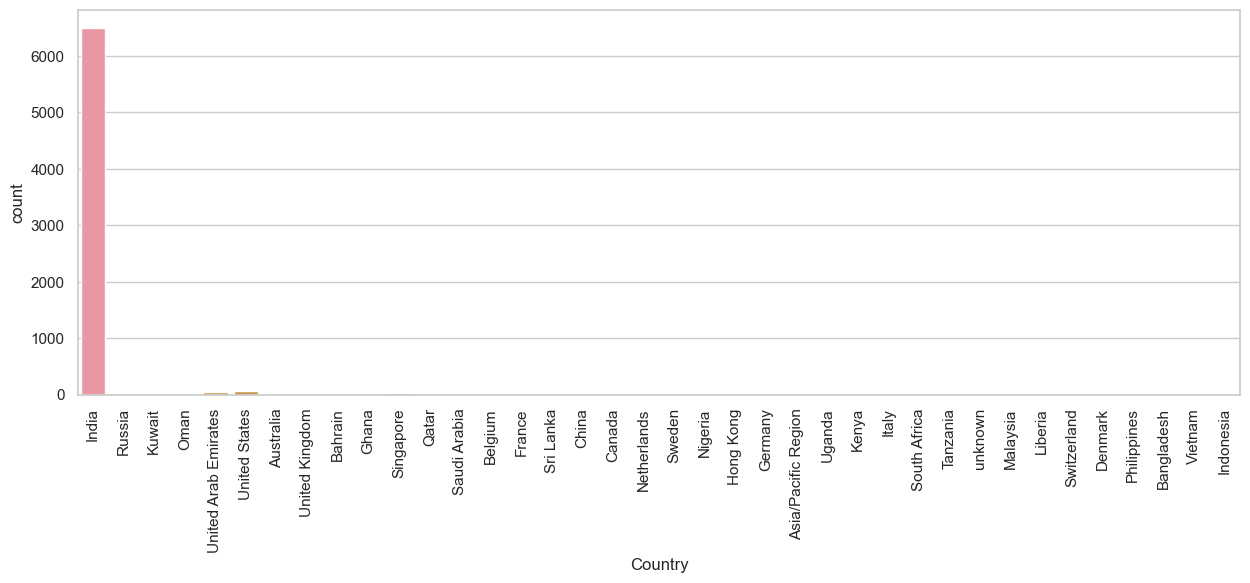

In [21]:
#plotting spread of Country columnn 
plt.figure(figsize=(15, 5))
sns.countplot(data=leads_df, x='Country')
plt.xticks(rotation=90)
plt.show()

As we can see the Number of Values for India are quite high (about 97% of the Data), this column can be dropped.

In [22]:
# Dropping 'Country' column from dataframe:-

leads_df.drop('Country', axis=1, inplace=True)

In [23]:
#checking value counts of Specialization column

leads_df['Specialization'].value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [24]:
# Lead may not have mentioned specialization because it was not in the list, So we will replace NaN values here with 'Not Specified'

leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'Not Specified')

In [25]:
# Imputing missing value with 'Other' :-

leads_df['Specialization'].fillna('Other',inplace=True)

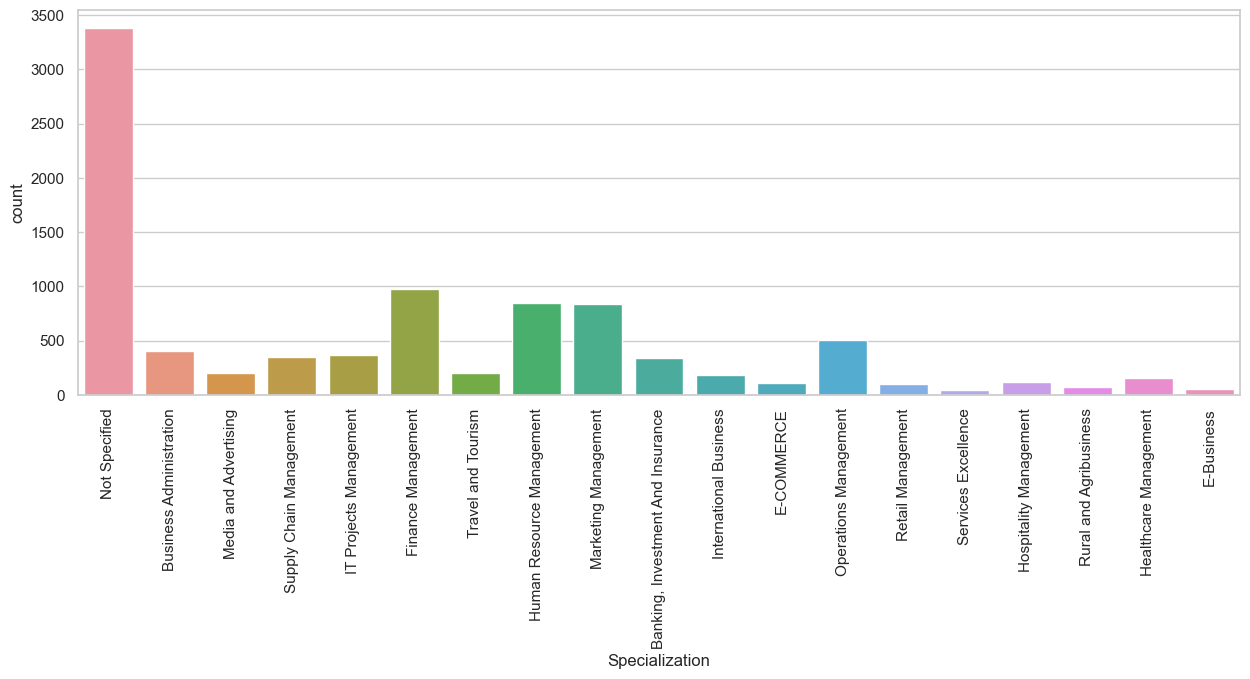

In [26]:
# Plotting count plot of 'Specialization' to see the data distribution
plt.figure(figsize=(15,5))
sns.countplot(data=leads_df, x='Specialization')
plt.xticks(rotation=90)
plt.show()

We observe that specializations containing "Management" have a higher number of leads as well as conversions. Therefore, this variable is considered significant and should be retained in the analysis.

In [27]:
#combining Management Specializations because they show similar trends

leads_df['Specialization'] = leads_df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

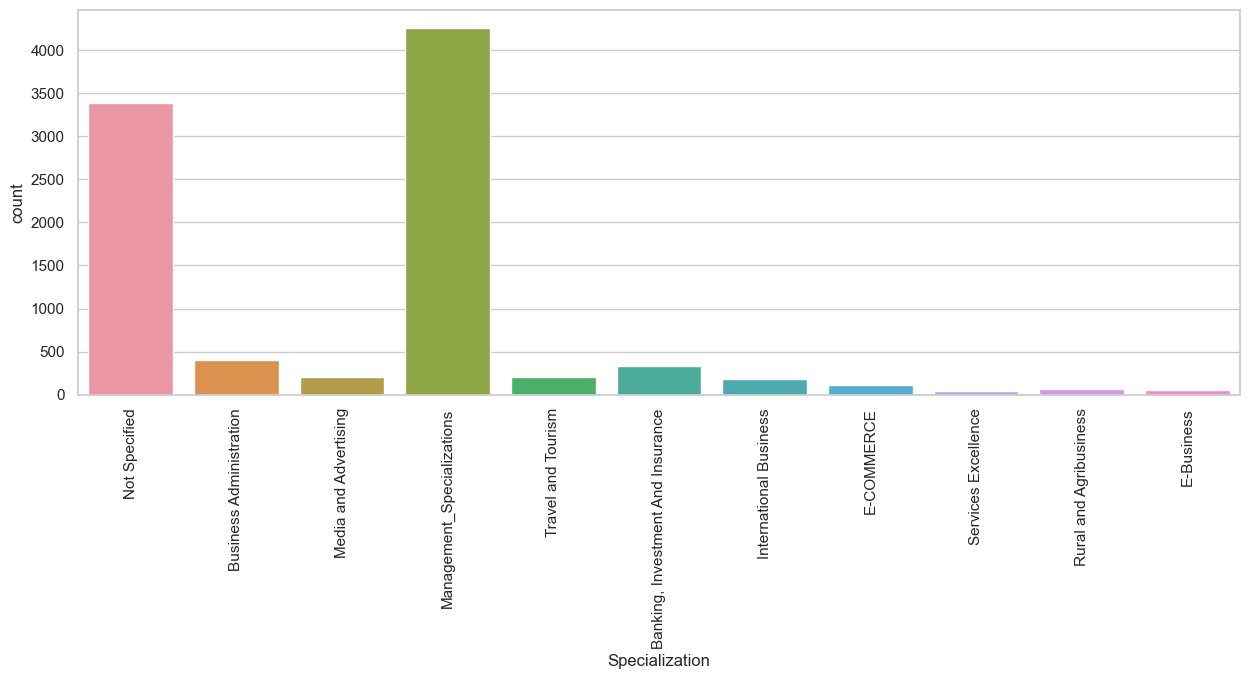

In [28]:
#plotting countplot of Variable based on Converted value
plt.figure(figsize=(15,5))
sns.countplot(data=leads_df, x='Specialization')
plt.xticks(rotation=90)
plt.show()

In [29]:
#checking value counts of "City" column
leads_df['City'].value_counts(dropna=False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

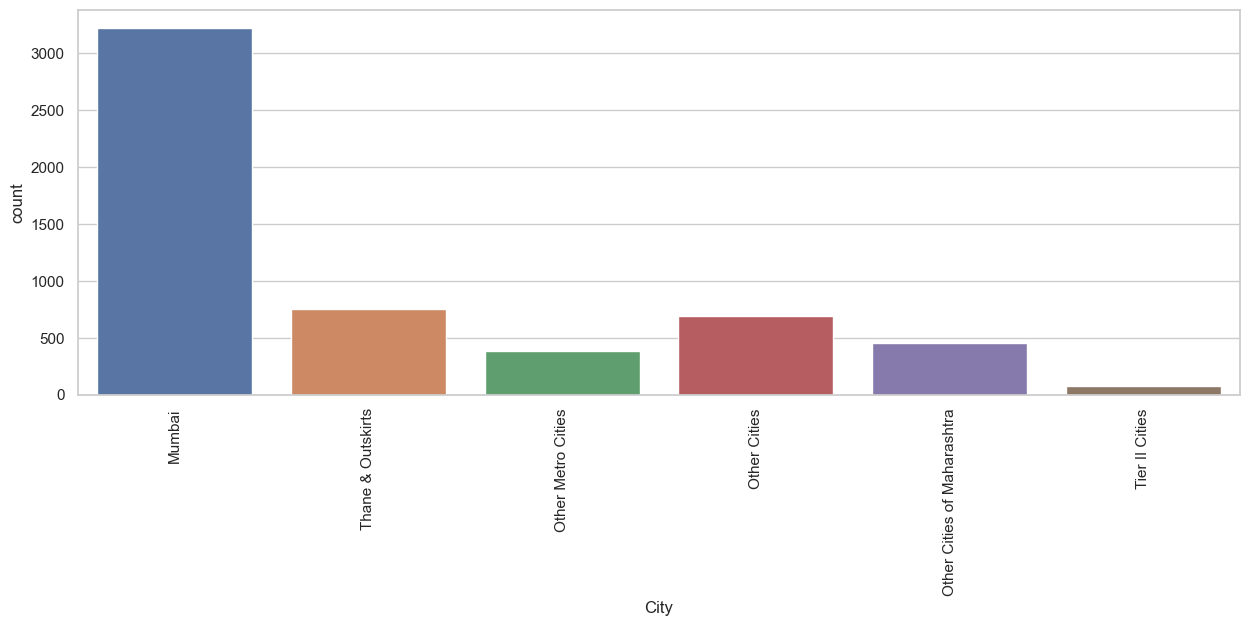

In [30]:
#plotting spread of City column
plt.figure(figsize=(15, 5))
sns.countplot(data=leads_df, x='City')
plt.xticks(rotation=90)
plt.show()

From the observation, Mumbai has highest numbers of leads
As it migh be able to interpret, the variable City won't be of any use in our analysis. So it's best that we drop it.

In [31]:
leads_df['City'] = leads_df['City'].replace(np.nan,'Mumbai')

In [32]:
# Checking value counts of 'What is your current occupation' column

leads_df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [33]:
#imputing Nan values with mode "Unemployed"

leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [34]:
#checking count of values
leads_df['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

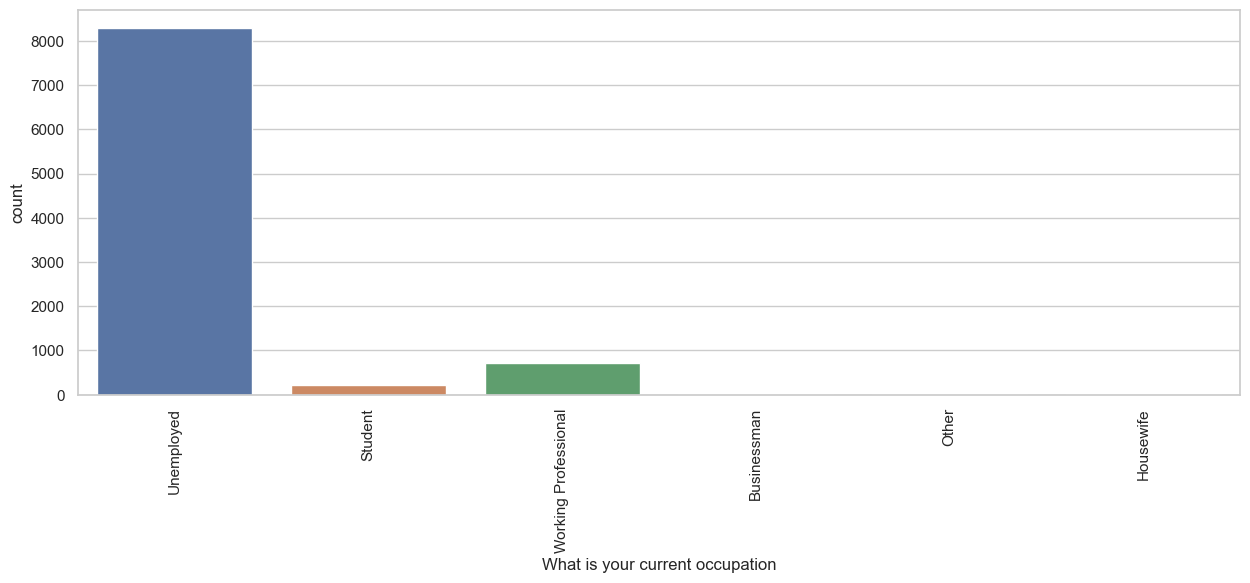

In [35]:
#plotting count plot of Variable based on Converted value
plt.figure(figsize=(15, 5))
sns.countplot(data=leads_df, x='What is your current occupation')
plt.xticks(rotation=90)
plt.show()

As we can observe, working professionals who enroll in the course have a higher likelihood of joining it. Additionally, it's worth noting that the number of unemployed leads is the highest in terms of absolute numbers.

In [36]:
#checking value counts'What matters most to you in choosing a course' feature
leads_df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

From above observation 'Better Career Prospects' is the most frequent value so we can replace missing value with 'Better Career Prospects'.



In [37]:
#replacing Nan values with Mode "Better Career Prospects"

leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

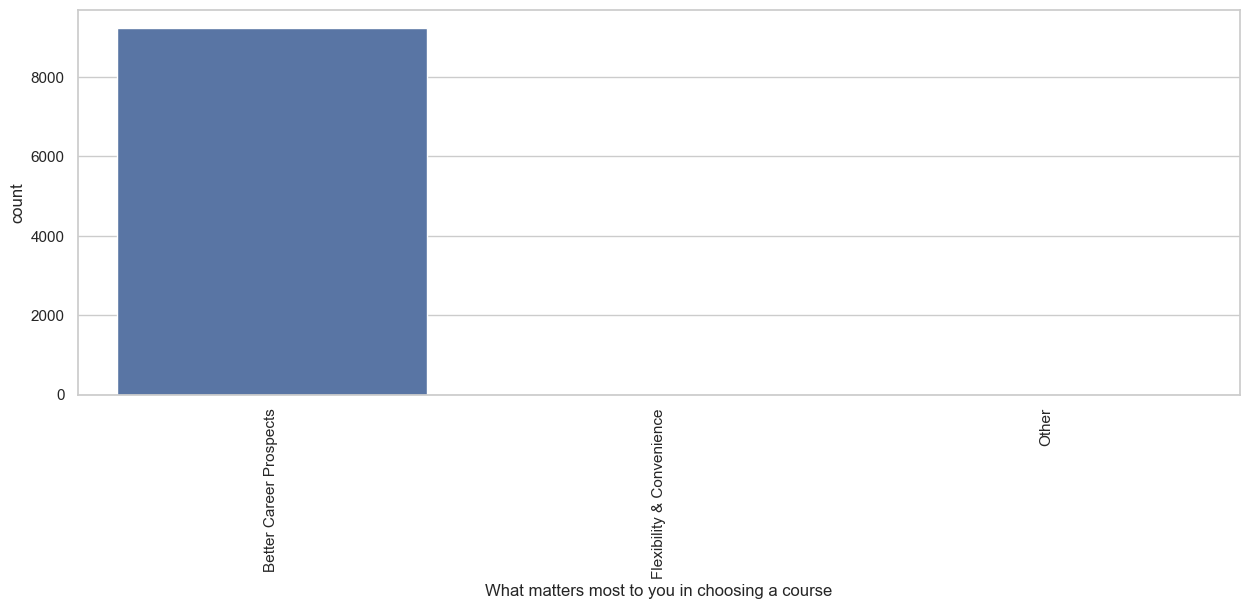

In [38]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15, 5))
sns.countplot(data=leads_df, x='What matters most to you in choosing a course')
plt.xticks(rotation=90)
plt.show()

In [39]:
#checking value counts of variable
leads_df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [40]:
# Checking value counts of 'Lead Source'

leads_df['Tags'].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [41]:
#replacing Nan values with "Not Specified"
leads_df['Tags'] = leads_df['Tags'].replace(np.nan,'Not Specified')

In [42]:
#replacing tags with low frequency with "Other Tags"
leads_df['Tags'] = leads_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

leads_df['Tags'] = leads_df['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

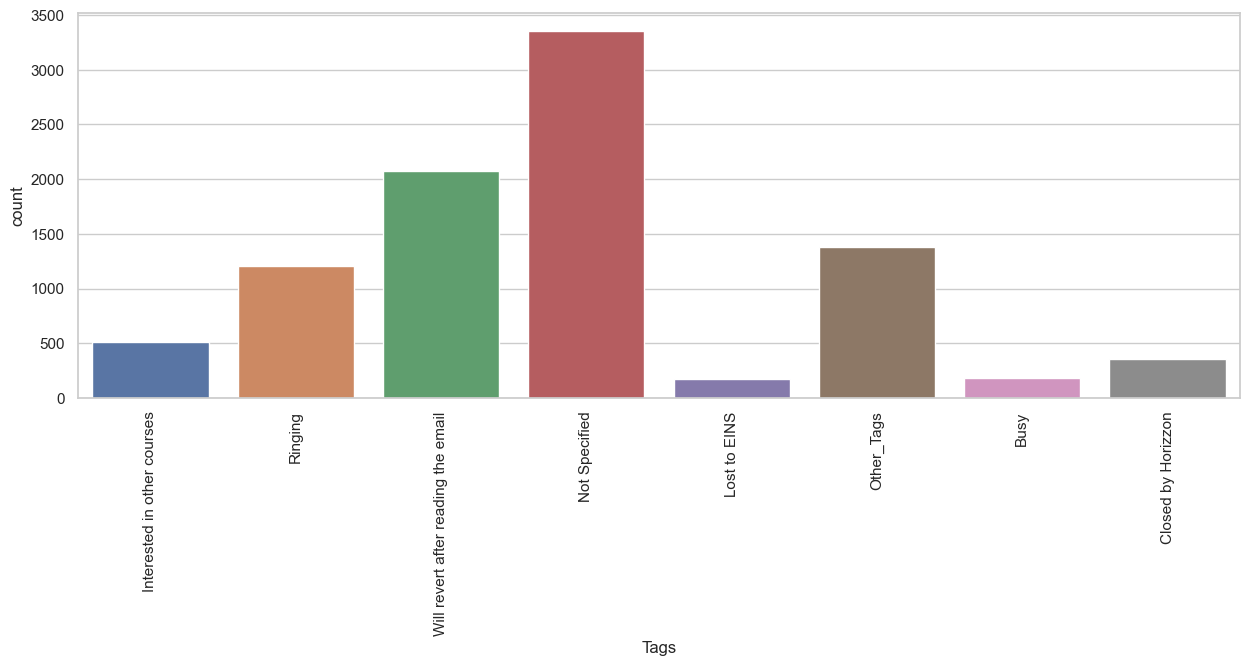

In [43]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15, 5))
sns.countplot(data=leads_df, x='Tags')
plt.xticks(rotation=90)
plt.show()

In [44]:
# Checking value counts of 'Lead Source'

leads_df['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

#### Observation
From above data we can see that there are two 'Google' and 'google' ,so better to replace 'google' with 'Google'. 
'Google' is having highest number occurance so we can impute missing values with 'Google'.

In [45]:
# Replace 'google' with 'Google' 
leads_df['Lead Source']=leads_df['Lead Source'].replace('google','Google')

In [46]:
# Verifying value counts again
leads_df['Lead Source'].value_counts()

Lead Source
Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

In [47]:
# Imputing missing values with 'Google'
leads_df['Lead Source'].fillna('Google',inplace=True)

In [48]:
#replacing Nan Values and combining low frequency values
leads_df['Lead Source'] = leads_df['Lead Source'].replace(np.nan,'Others')
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')
leads_df['Lead Source'] = leads_df['Lead Source'].replace('Facebook','Social Media')
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others') 

We can group some of the labels with lower frequency occurrences under a common label 'Others'.

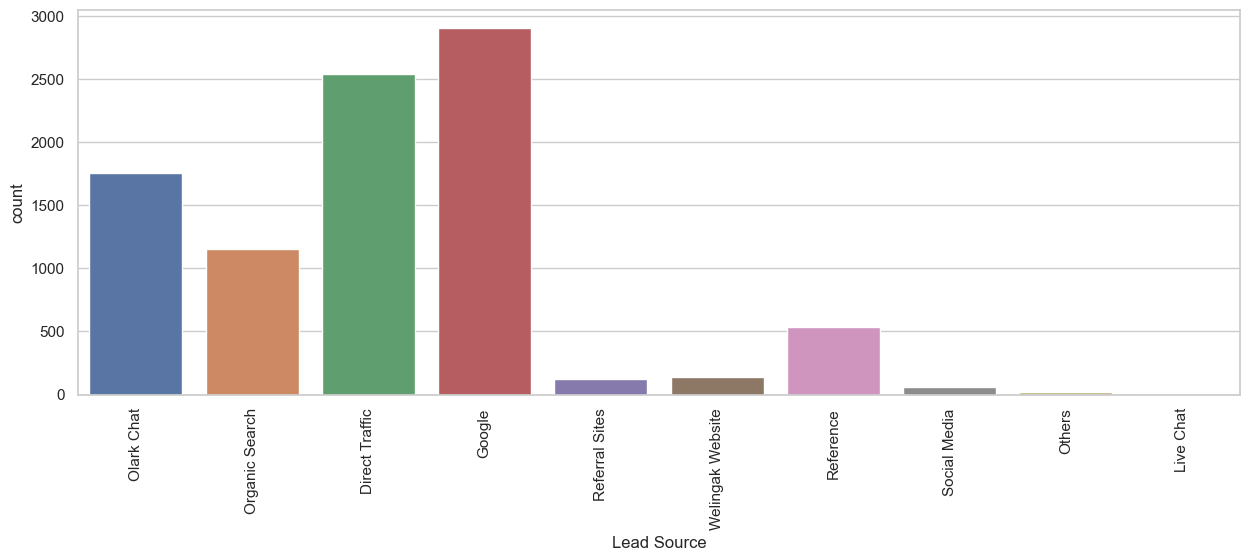

In [49]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15, 5))
sns.countplot(data=leads_df, x='Lead Source')
plt.xticks(rotation=90)
plt.show()

### Observation:
1. The majority of leads are generated by Google and Direct traffic.
2. The conversion rate of reference leads and leads through the Welingak website is high.
3. To enhance the overall lead conversion rate, efforts should be concentrated on improving the lead conversion of Olark chat, organic search, direct traffic, and Google leads, while also increasing lead generation from reference and Welingak website.

In [50]:
#checking percentage of missing values
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [51]:
#Checking value counts for 'Last Activity'
leads_df['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

#### Observation
As we do not know the last activity of leads which are missing values and most frequent value is 'Email Opened' so we can impute missing value with 'Email Opened'.

In [52]:
#replacing Nan Values and combining low frequency values
leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan,'Others')
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

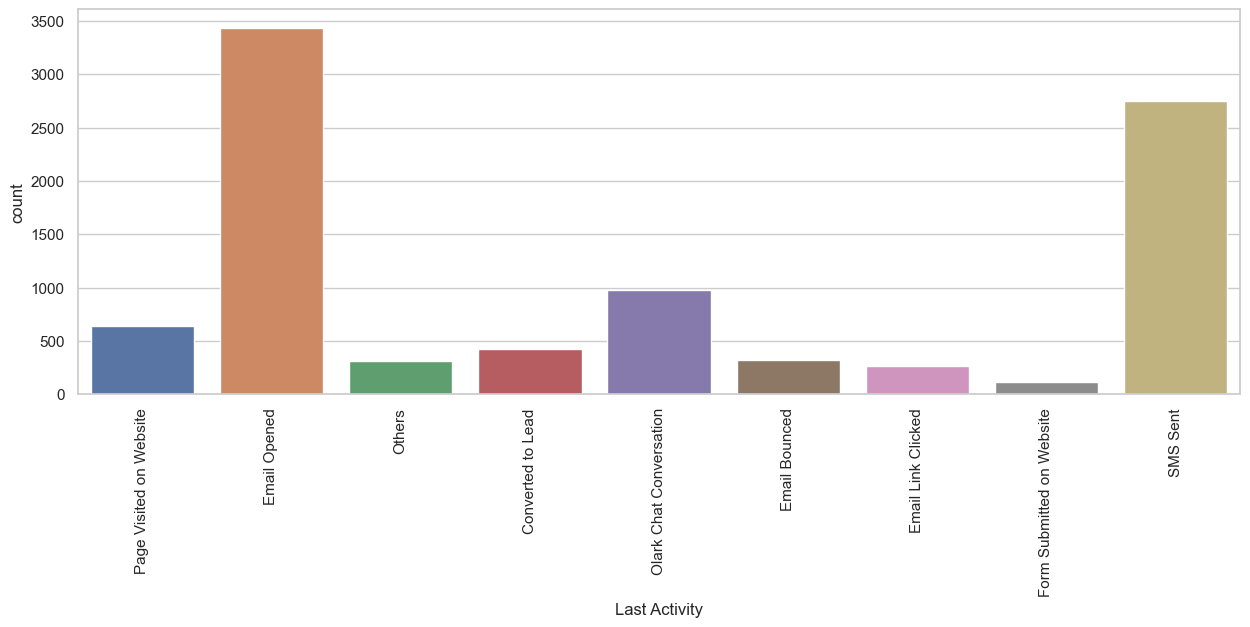

In [53]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15, 5))
sns.countplot(data=leads_df, x='Last Activity')
plt.xticks(rotation=90)
plt.show()

In [54]:
# Imputing missing value with 'median' value for both 'TotalVisits' and 'Page Views Per Visit' columns:-

leads_df['TotalVisits'].fillna(leads_df['TotalVisits'].median(), inplace=True)

leads_df['Page Views Per Visit'].fillna(leads_df['Page Views Per Visit'].median(), inplace=True)

In [55]:
#Checking percentage of Null Values in All Columns:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

Observation:-
We can see that there is no missing values for categorical variables now,so we can proceed for further analysis.


In [56]:
# Now checking shape of the dataframe:-

leads_df.shape

(9240, 27)

### Checking data imbalance


In [57]:
# Checking the value_counts of remaining variables for better data understanding :-

cols=list(leads_df.iloc[:,:])  # Creating list 'cols' of variables


for i in cols:
    print(i,'=====')
    print(leads_df[i].value_counts(), '\n')

Lead Origin =====
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64 

Lead Source =====
Lead Source
Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                19
Live Chat              2
Name: count, dtype: int64 

Do Not Email =====
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64 

Do Not Call =====
Do Not Call
No     9238
Yes       2
Name: count, dtype: int64 

Converted =====
Converted
0    5679
1    3561
Name: count, dtype: int64 

TotalVisits =====
TotalVisits
0.0      2189
2.0      1680
3.0      1443
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0    

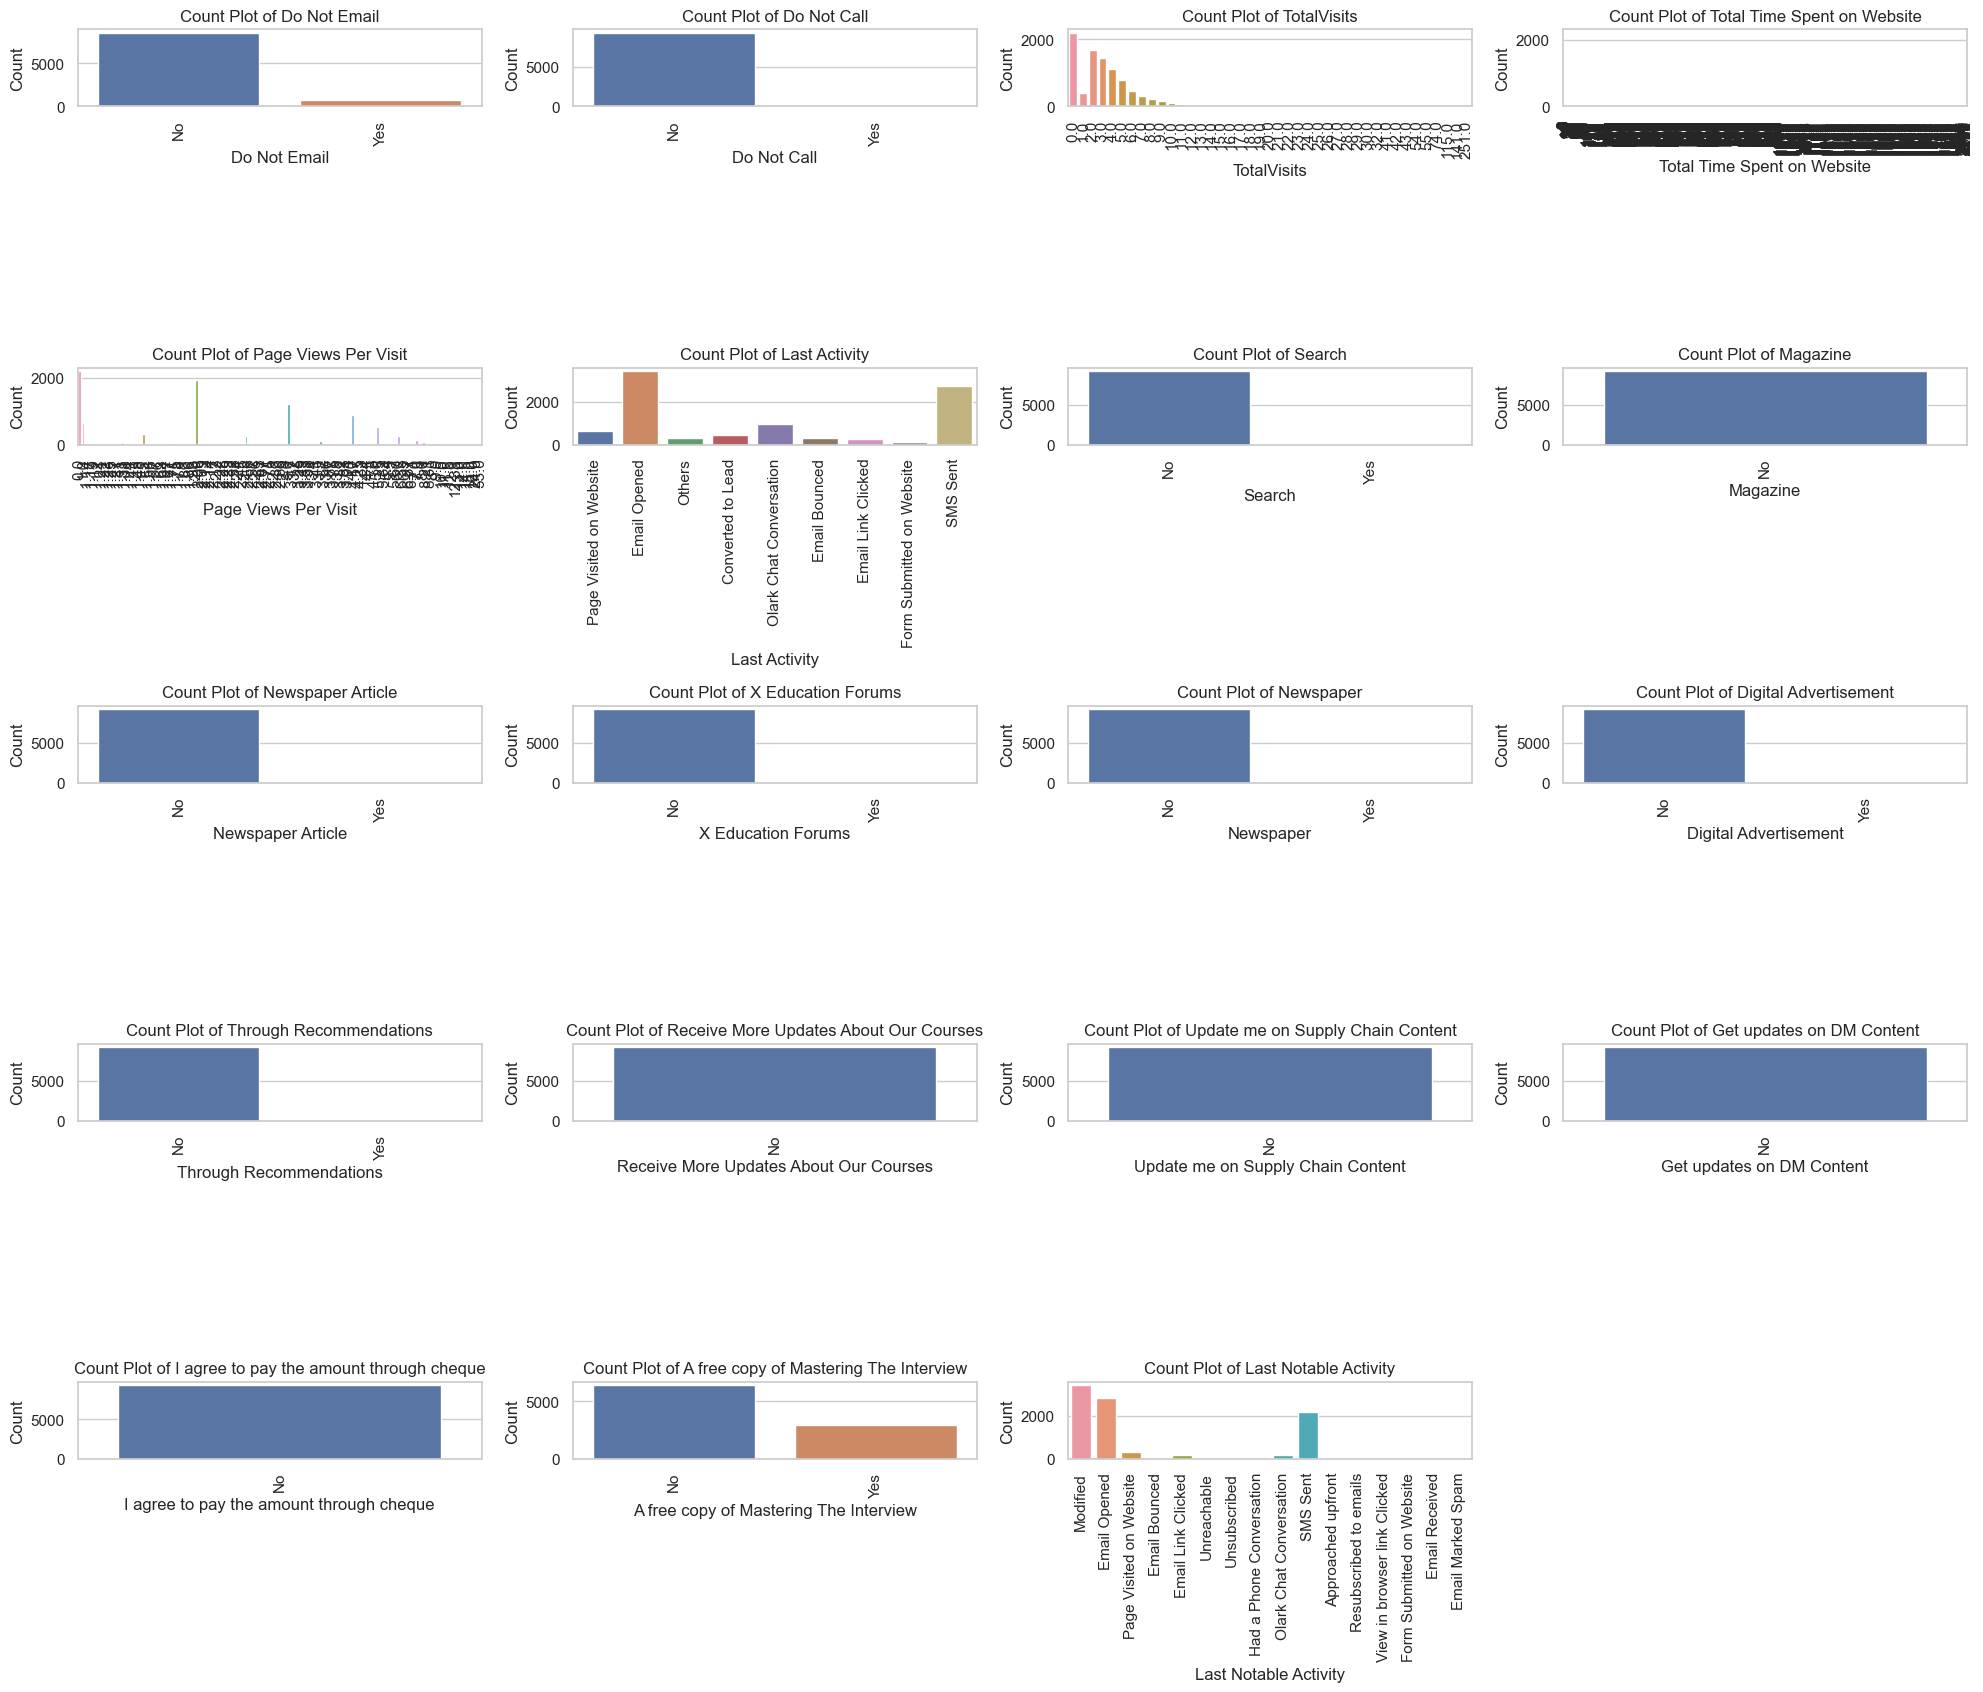

In [58]:
# List of columns to plot
cols = [
     'Do Not Email', 'Do Not Call', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
    'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
    'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview',
    'Last Notable Activity'
]

# Plotting count plots for columns for analysis decisions
plt.figure(figsize=(20, 25))
for i, col in enumerate(cols, 1):
    plt.subplot(8, 4, i)
    sns.countplot(data=leads_df, x=col)
    plt.title('Count Plot of ' + col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Obervations:

Lead Origin Column:
1. API and Landing Page Submission bring higher number of leads as well as conversion.
2. Lead Add Form has a very high conversion rate but count of leads are not very high.
3. Lead Import and Quick Add Form get very few leads.
4. In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

-->Do Not Call Column can be dropped since > 90% is of only one Value
--> From Above observations we cans see that certain columns such as 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', and 'I agree to pay the amount through cheque' contain highly imbalanced or skewed data. These variables are not much has contribution to our analysis. Therefore,We can drop these columns.


In [59]:
# Dropping variables which are having imbalanced data
columns_to_drop = ['Do Not Call', 'What matters most to you in choosing a course', 'Search', 'Magazine', 
                   'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
                   'Through Recommendations', 'Receive More Updates About Our Courses', 
                   'Update me on Supply Chain Content', 'Get updates on DM Content','Tags',
                   'I agree to pay the amount through cheque','Last Notable Activity']

leads_df.drop(columns_to_drop, axis=1, inplace=True)

In [60]:
#Droppint coolumn city as not necessary for the analysis of models
leads_df.drop('City', axis=1, inplace=True)

In [61]:
# Now Checking shape of the dataframe after dropping variables

leads_df.shape

(9240, 11)

In [62]:
#getting information of the leads dataframe 
leads_df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website            Not Specified   
1             Email Opened            Not Specified   
2             Email Opened  Business Administration   
3                   Others    Media and Advertising   
4        Converted to Lead            Not Specified   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

# Step 3: Exploratory Data Analysis(EDA)


As per problem statement 'Converted' is our target variable.

The target variable so it indicates whether a lead has been successfully converted or not.

0: Not converted into lead.

1: Lead has been successfully Converted.

In [63]:
#Check the % of Data that has Converted Values = 1:
Converted = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
Converted

38.53896103896104

## Checking Distribution of 'TARGET' Variable


In [64]:
#Checking value count of target variable 'Converted':-
leads_df.Converted.value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

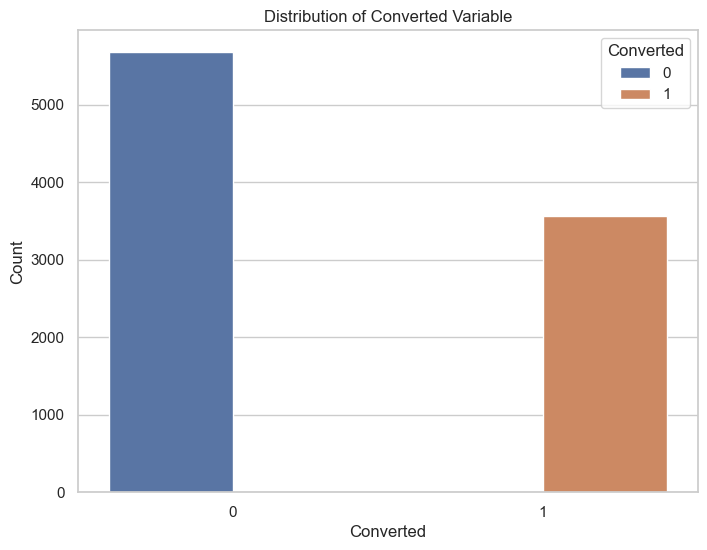

In [65]:
# Plotting count plot to visualize the data distribution of 'Converted' column
plt.figure(figsize=(8, 6))
sns.countplot(data=leads_df, x='Converted',hue= 'Converted')
plt.title("Distribution of Converted Variable")
plt.xlabel("Converted")
plt.ylabel("Count")
plt.show()

From above graph: We have around 30% of Conversion Rate

In [66]:
#Now we can check the ratio of imbalance

(leads_df.Converted==1).sum()/(leads_df.Converted==0).sum()

0.6270470153195985

### Observation
From value count and count plot we can see that data is properly balanced with respect to ratio.

In [67]:
# Again checking data types of remaining columns:-
leads_df.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
dtype: object

## Categorical Variables Analysis

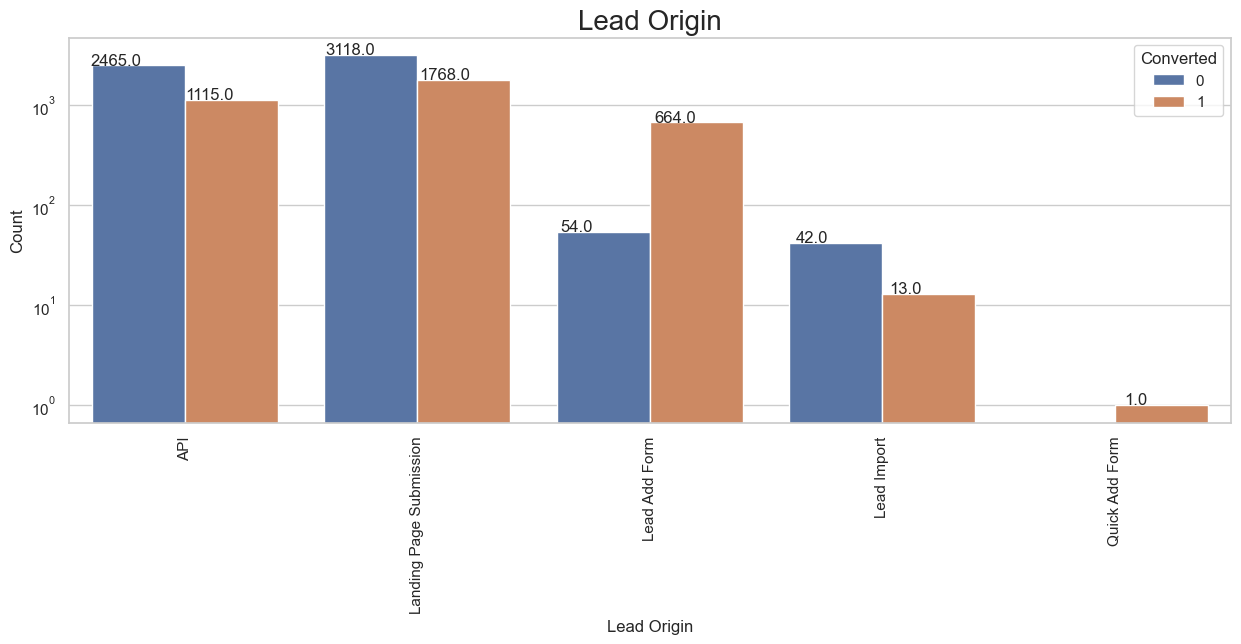

In [68]:
# Plotting count plot of 'Lead Origin' for both 'Converted' 0 and 1
plt.figure(figsize=(15, 5))

ax = sns.countplot(x="Lead Origin", hue="Converted", data=leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation=90)
plt.title('Lead Origin', fontsize=20)
ax.set_yscale('log')

plt.xlabel('Lead Origin')
plt.ylabel('Count')
plt.show()


### Observation:
1. The conversion rate for leads originating from 'API' is approximately 31%, while for 'Landing Page Submission' it's around 36%.
2. Leads generated through 'Lead Add Form' show a higher number of conversions compared to unsuccessful conversions.
3. The count of leads imported ('Lead Import') is relatively lower compared to other lead origins.

### Recommendation:
1. To enhance the overall lead conversion rate, it's essential to focus on improving the conversion of leads from 'API' and 'Landing Page Submission' origins.
2. Efforts should be made to generate more leads through 'Lead Add Form' to capitalize on its higher conversion potential.

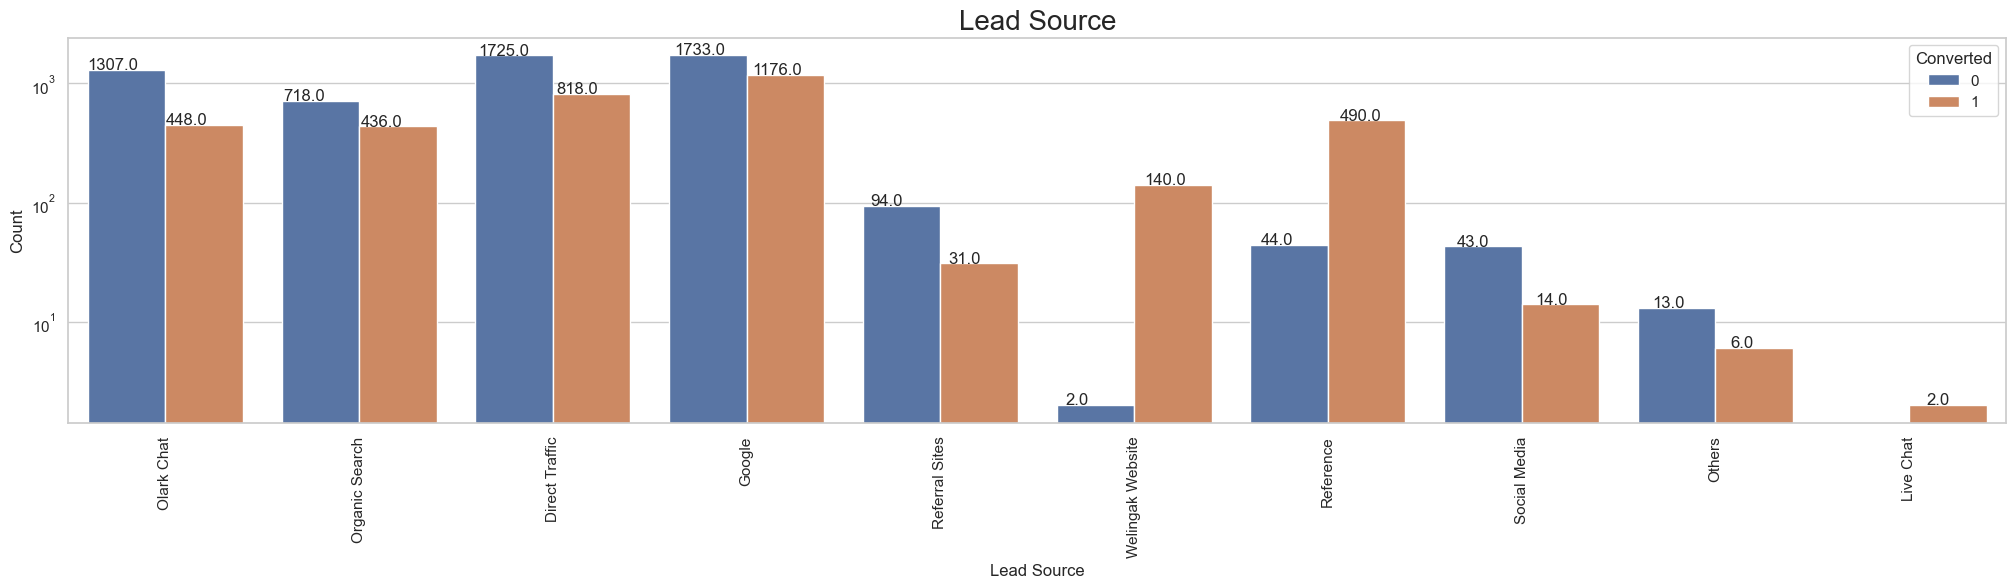

In [69]:
# Plotting count plot of 'Lead Source' based on 'Converted' value 0 and 1
plt.figure(figsize=(25, 5))

ax = sns.countplot(x="Lead Source", hue="Converted", data=leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation=90)
plt.title('Lead Source', fontsize=20)

ax.set_yscale('log')  # Setting logarithmic scale

plt.xlabel('Lead Source')
plt.ylabel('Count')

plt.show()


### Observation:
1. Maximum leads are generated from Google and Direct traffic sources.
2. The conversion rate of leads from 'Reference' and 'Welingak Website' sources is relatively high.

### Recommendation:
1. To enhance the overall lead conversion rate, prioritize improving the conversion rates of leads from Olark Chat, Organic Search, Direct Traffic, and Google sources.
2. Efforts should be made to generate more leads from 'Reference' and 'Welingak Website' sources to capitalize on their higher conversion potential.

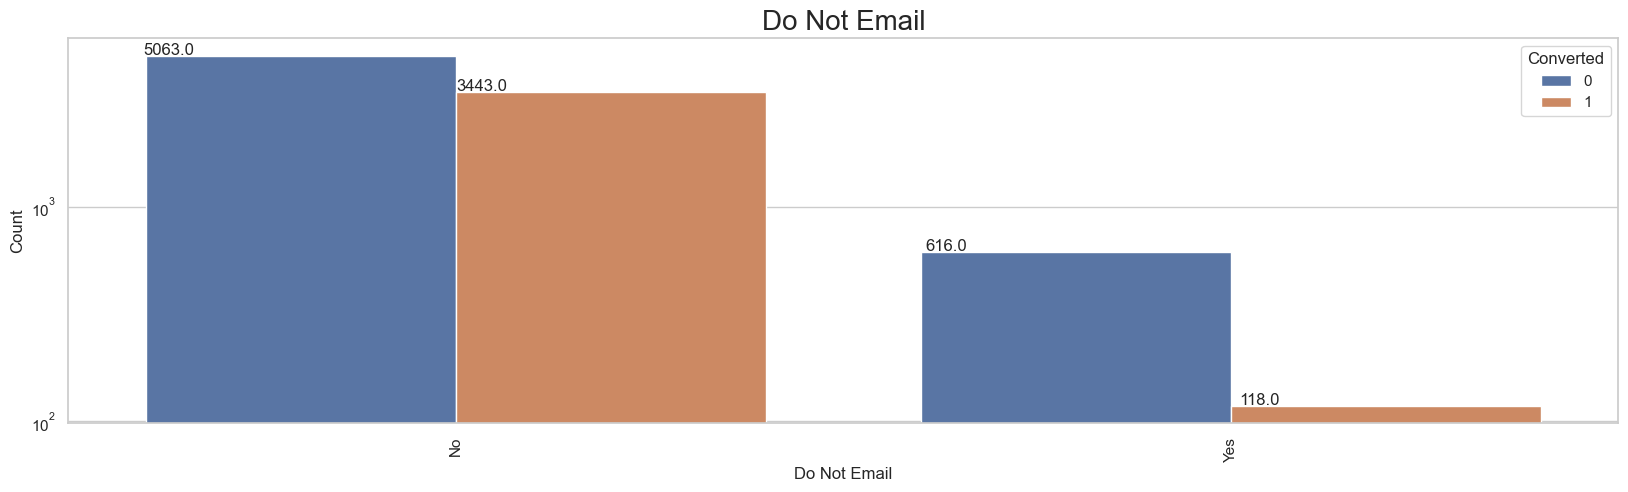

In [70]:
# Plotting count plot of 'Do Not Email' based on 'Converted' value 0 and 1
plt.figure(figsize=(20, 5))

ax = sns.countplot(x="Do Not Email", hue="Converted", data=leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation=90)
plt.title('Do Not Email', fontsize=20)

ax.set_yscale('log')  # Setting logarithmic scale

plt.xlabel('Do Not Email')
plt.ylabel('Count')

plt.show()


### Observation:
1. A higher number of leads are generated from people who opted for the email option.


This suggests that offering the email option seems to be effective in attracting leads.

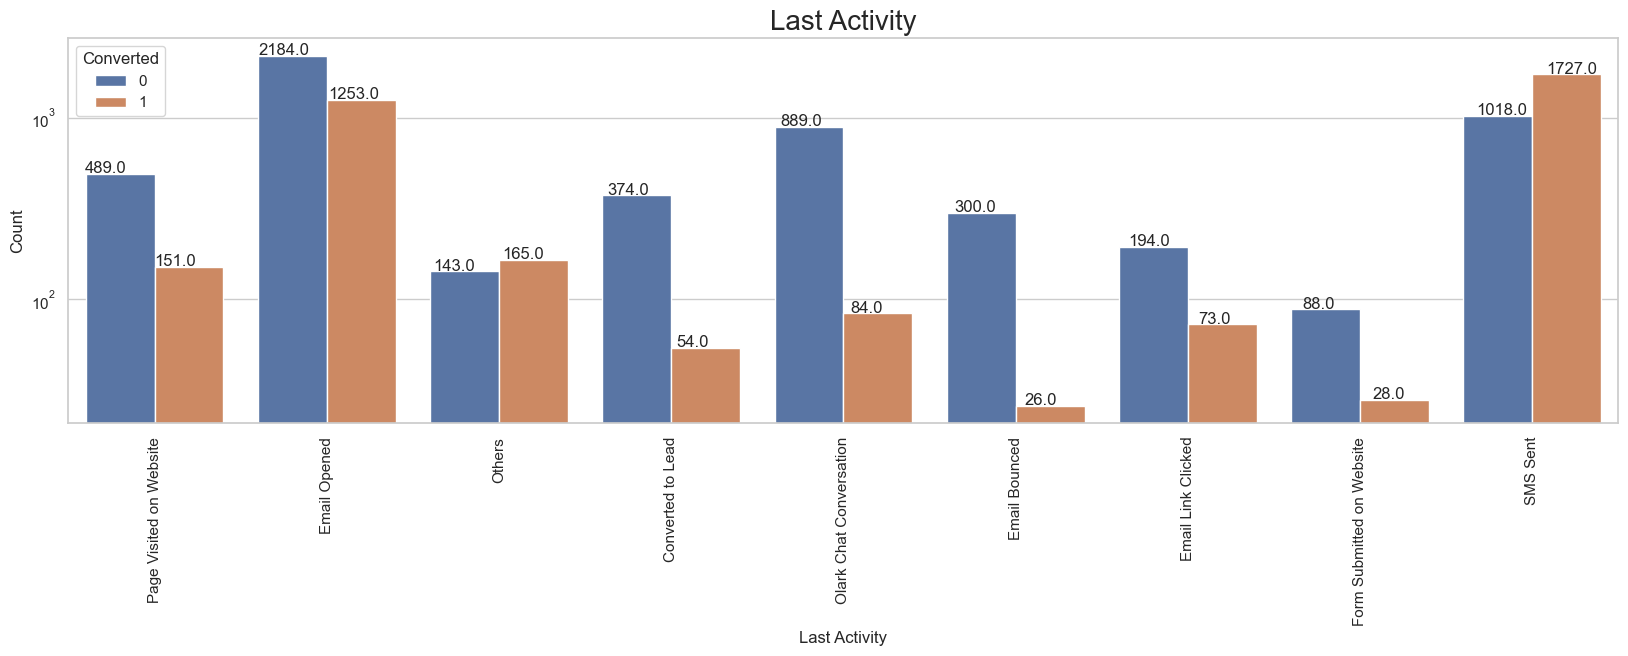

In [71]:
# Plotting count plot of 'Last Activity' based on 'Converted' value 0 and 1
plt.figure(figsize=(20, 5))

ax = sns.countplot(x="Last Activity", hue="Converted", data=leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation=90)
plt.title('Last Activity', fontsize=20)

ax.set_yscale('log')  # Setting logarithmic scale

plt.xlabel('Last Activity')
plt.ylabel('Count')

plt.show()


### Observation:
1. The conversion rate for leads with the last activity of 'SMS Sent' is approximately 63%.
2. The most common last activity for leads is 'Email Opened'.


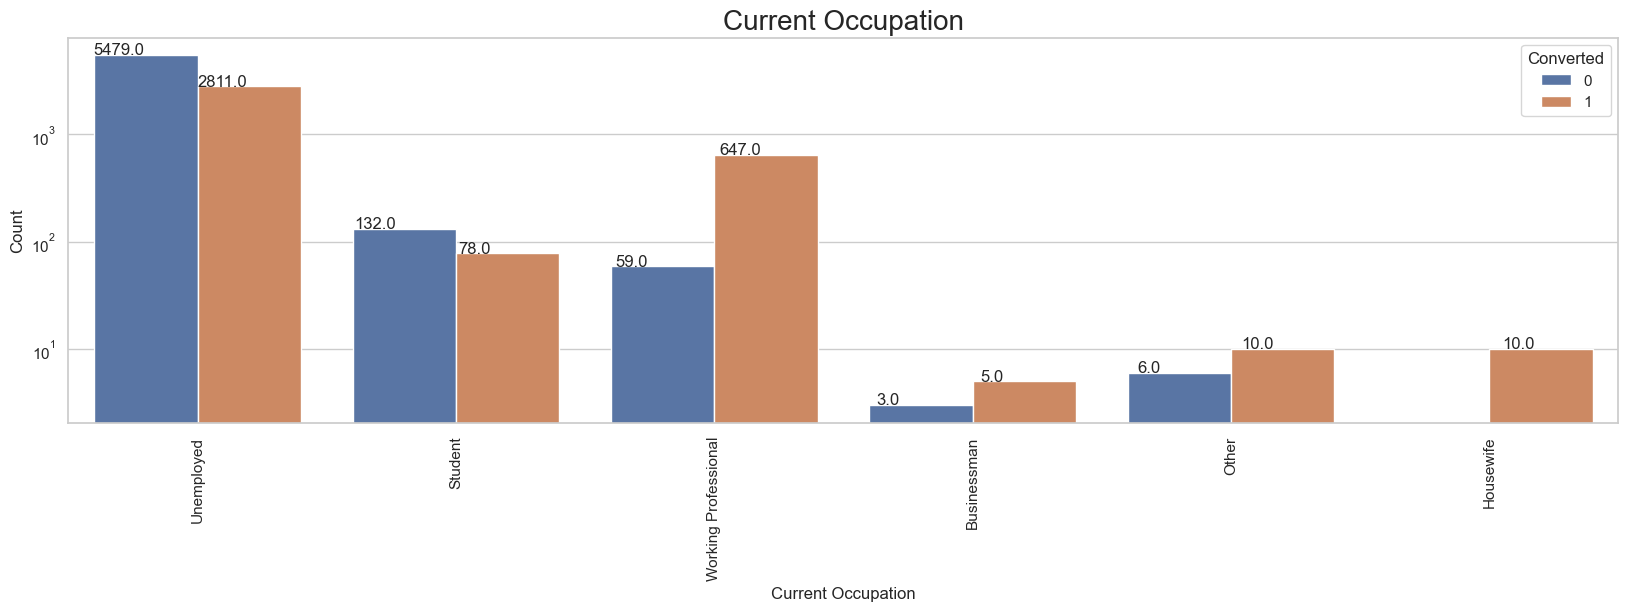

In [72]:
# Plotting count plot of 'What is your current occupation' based on 'Converted' value 0 and 1
plt.figure(figsize=(20, 5))

ax = sns.countplot(x="What is your current occupation", hue="Converted", data=leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation=90)
plt.title('Current Occupation', fontsize=20)

ax.set_yscale('log')  # Setting logarithmic scale

plt.xlabel('Current Occupation')
plt.ylabel('Count')

plt.show()

### Observation:
1. 'Unemployed' leads are generating a higher number of leads and have approximately a 45% conversion rate.
2. The conversion rate is higher for 'Working Professionals'.


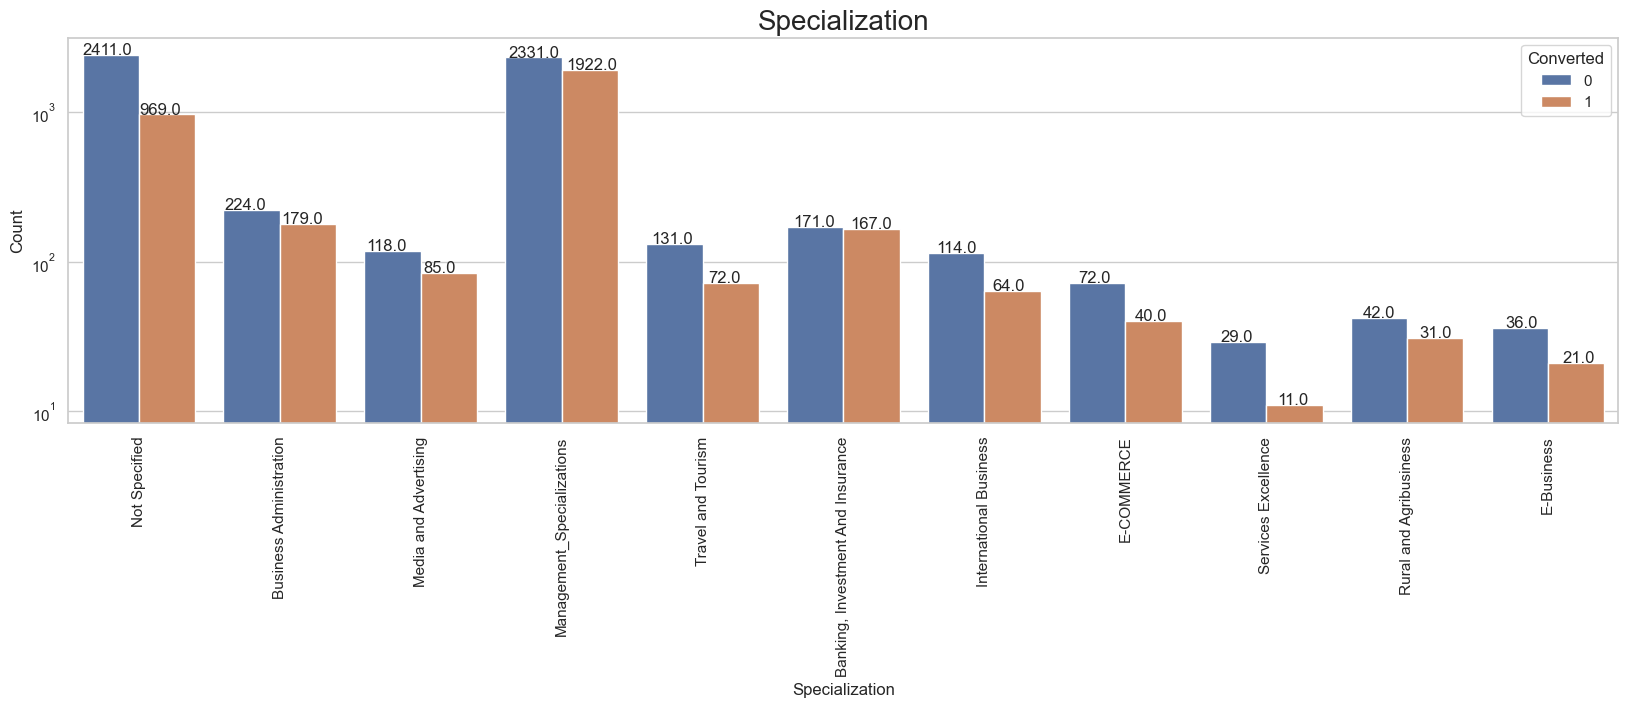

In [73]:
# Plotting count plot of 'Specialization' based on 'Converted' value 0 and 1 for dataframe leads_df
plt.figure(figsize=(20, 5))

ax = sns.countplot(x="Specialization", hue="Converted", data=leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation=90)
plt.title('Specialization', fontsize=20)

ax.set_yscale('log')  # Setting logarithmic scale

plt.xlabel('Specialization')
plt.ylabel('Count')

plt.show()

### Observation:
1. From the count plot of 'Specialization', we observe that 'Management' specialization has the highest number of leads generated.
2. The 'Other' category also contributes significantly to the number of leads generated.

## Outlier Analysis and Treatment


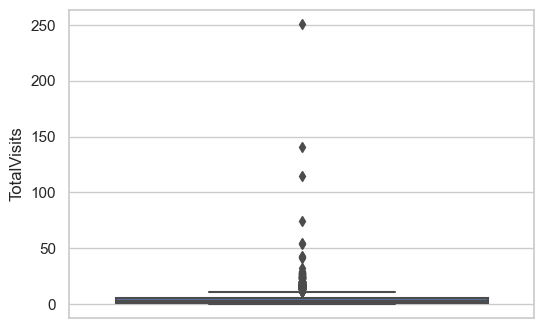

In [74]:
#Plotting Box plot for the 'TotalVisits' numerical variable
plt.figure(figsize=(6,4))
sns.boxplot(y=leads_df['TotalVisits'])
plt.show()

### Observation:
1. From the above box plot, we observe that only upper range outliers are present in the data. Therefore, it is necessary to treat these outliers.

In [75]:
#checking percentile values for "Total Visits"
leads_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [76]:
Q3 = leads_df['TotalVisits'].quantile(0.99)
Q1 = leads_df['TotalVisits'].quantile(0.01)

leads_df['TotalVisits'] = np.where(leads_df['TotalVisits'] > Q3, Q3, leads_df['TotalVisits'])
leads_df['TotalVisits'] = np.where(leads_df['TotalVisits'] < Q1, Q1, leads_df['TotalVisits'])

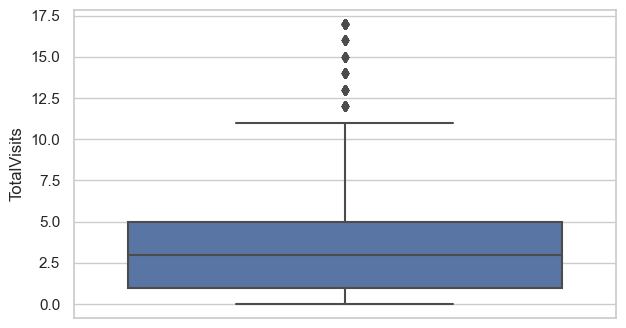

In [77]:
# Checking outliers after removing it 

plt.figure(figsize=(7, 4))
sns.boxplot(y=leads_df['TotalVisits'])
plt.show()


In [78]:
#checking spread of "Page Views Per Visit"
leads_df['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

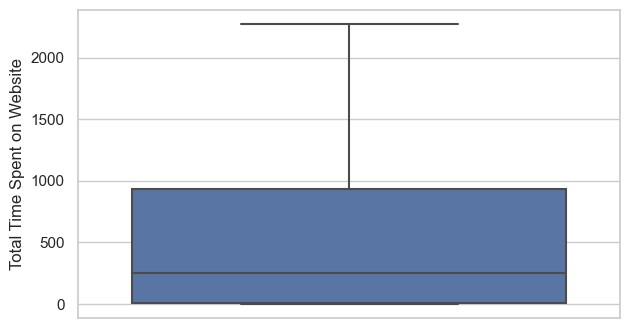

In [79]:
# Plotting box plots to visualize data distribution of 'Total Time Spent on Website':-
plt.figure(figsize=(7,4))
sns.boxplot(y=leads_df['Total Time Spent on Website'],orient='v')
plt.show()

### Observation:
From the above box plot, we observe that there are no outliers in the data.Therefore, there is no need for further treatment of outliers.



In [80]:
#checking description of "Page Views Per Visit"
leads_df['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

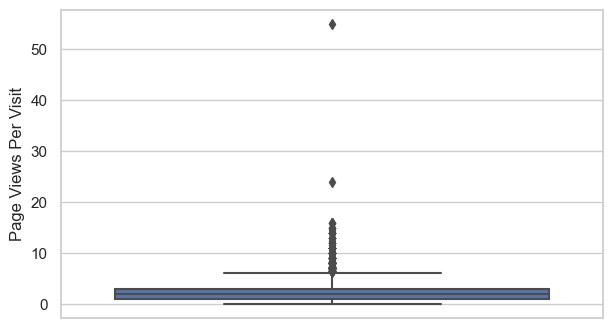

In [81]:
# Plotting box plots to visualize data distribution of 'Page Views Per Visit':-

plt.figure(figsize=(7,4))
sns.boxplot(y=leads_df['Page Views Per Visit'],orient='v')
plt.show()

In [82]:
# Treating upper range outliers by capping upper range to 0.99

Q3 = leads_df['Page Views Per Visit'].quantile(0.99)
leads_df = leads_df[(leads_df['Page Views Per Visit'] <= Q3)]

Q3 = leads_df['Page Views Per Visit'].quantile(0.99)
Q1 = leads_df['Page Views Per Visit'].quantile(0.01)

leads_df['Page Views Per Visit'] = np.where(leads_df['Page Views Per Visit'] > Q3, Q3, leads_df['Page Views Per Visit'])
leads_df['Page Views Per Visit'] = np.where(leads_df['Page Views Per Visit'] < Q1, Q1, leads_df['Page Views Per Visit'])

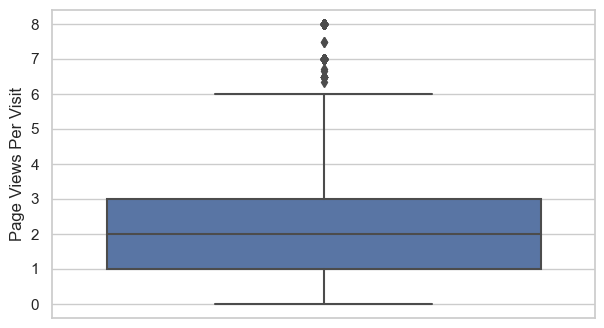

In [83]:
# Verifying outliers after removing it 

plt.figure(figsize = (7,4))
sns.boxplot(y=leads_df['Page Views Per Visit'])
plt.show()

In [84]:
#checking missing values in leftover columns/

round(100*(leads_df.isnull().sum()/len(leads_df.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
dtype: float64

## Numerical Variable Analysis

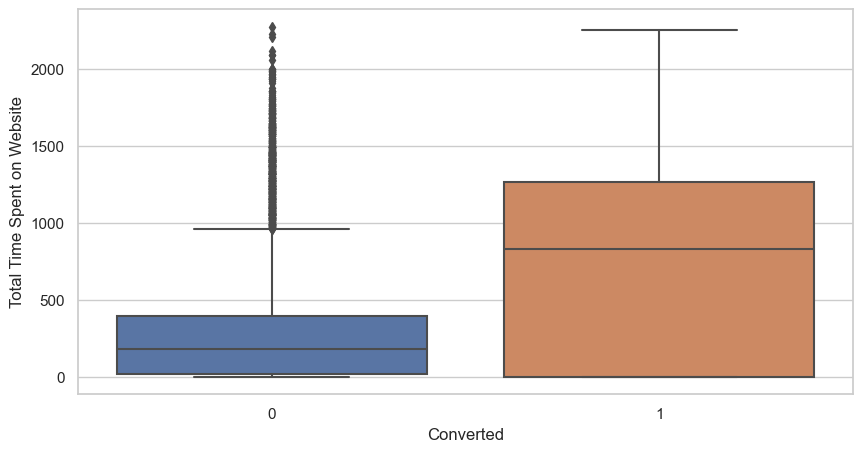

In [85]:
# Plotting box plot of "Total Time Spent on Website" vs Converted variable 

plt.figure(figsize=(10,5))
sns.boxplot(x='Converted', y='Total Time Spent on Website',data=leads_df)
plt.show()


## Observation
The above box plot shows Leads spending more time on website are more likely to opt for curses or converted.

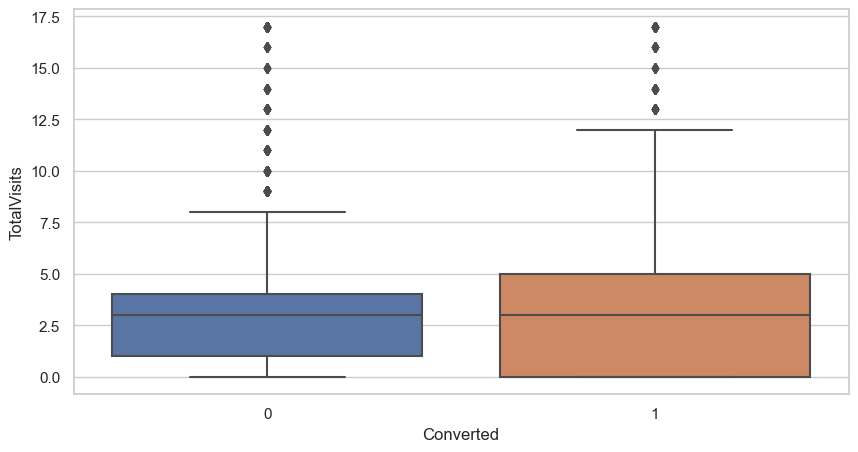

In [86]:
# Plotting box of "Total Visits" vs Converted variable 

plt.figure(figsize=(10,5))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_df)
plt.show()

### Observation
From above plot we can see that median for converted and non-converted is approx same.

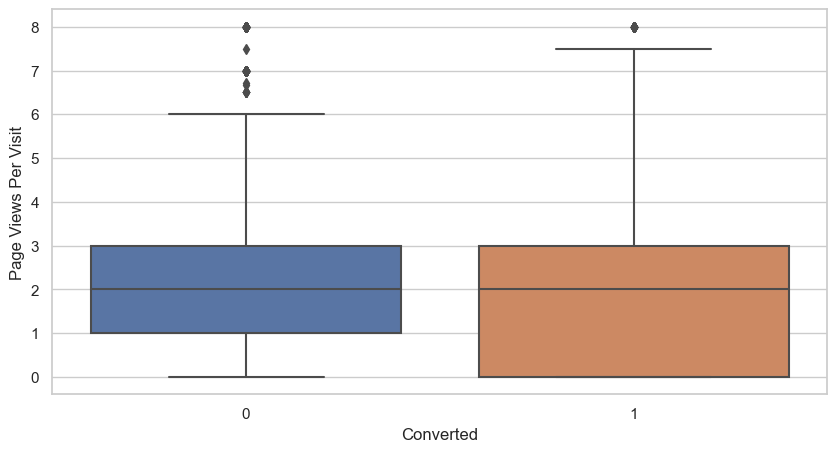

In [87]:
# Plotting box of "Page Views Per Visit" vs Converted variable 

plt.figure(figsize=(10,5))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_df)
plt.show()

Inference: 

From above Median for converted and unconverted leads is the same. and Nothing can be said specifically for lead conversion from Page Views Per Visit

## Bivariate Analysis


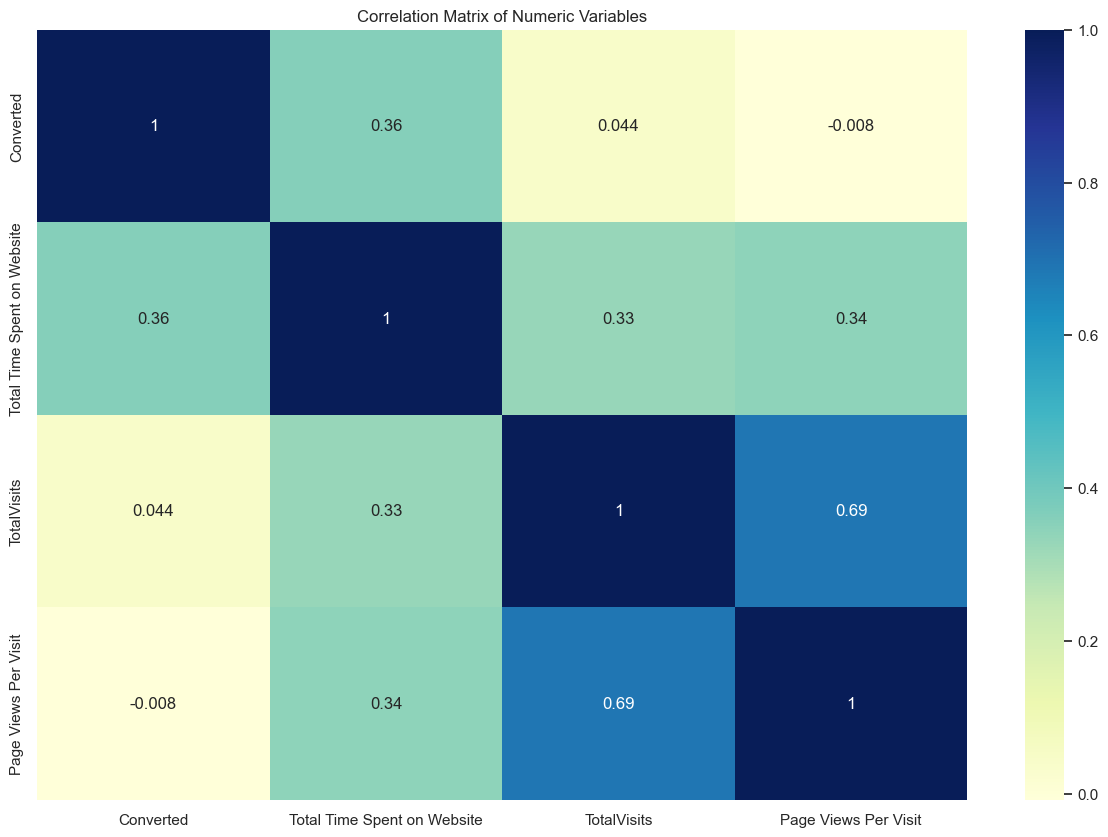

In [88]:
# Selecting only the numeric columns for correlation analysis
numeric_columns = ['Converted', 'Total Time Spent on Website','TotalVisits', 'Page Views Per Visit']

# Calculating the correlation matrix
correlation_matrix = leads_df[numeric_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


## Observation
--> 'TotalVisits' and 'Page Views per Visit' are highly correlated with correlation of .69

-->'Total Time Spent on Website' has correlation of 0.36 with target variable 'Converted'.

# Step 4: Data Preparation


## Dummy Variable Creation

#### Converting binary data into 1/0

In [89]:
# List of binary variables to map
varlist = ['A free copy of Mastering The Interview', 'Do Not Email']

# Defining the mapping function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying the binary mapping function to the specified variables in the DataFrame
leads_df[varlist] = leads_df[varlist].apply(binary_map)

In [90]:
# Checking head of dataframe 
leads_df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website            Not Specified   
1             Email Opened            Not Specified   
2             Email Opened  Business Administration   
3                   Others    Media and Advertising   
4        Converted to Lead            Not Specified   

  What is your current occupation  A free copy of Mastering The Interview  
0                      Unemployed                                       0  
1                      Unemployed                                       0  
2                         Student                                       1  
3                      Unemployed                                       0  
4                      Unemployed                                       0

In [91]:
# Creating list 'cat_col' of categorical columns
cat_col= leads_df.select_dtypes(include=['object']).columns
cat_col

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation'],
      dtype='object')

In [92]:
# Creating dummy variable for some of the categorical variables and dropping the first one using 'drop_first=True':-

dummy = pd.get_dummies(leads_df[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
                             'Specialization']], drop_first=True)

# Converting boolean dummy variables to integers (0 or 1)
dummy = dummy.astype(int)


dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
0                        0                           0                   0   
1                        0                           0                   0   
2                        0                           0                   0   
3                        0                           0                   0   
4                        0                           0                   1   

   Lead Source_Live Chat  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                      0                       1                           0   
1                      0                       0                           1   
2                      0                       0                           0   
3                      0                       0                           0   
4                      0                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Social Media  Lead Source_Welingak Website  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             0   
4                         0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     1   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   What is your current occupation_Housewife  \
0                                          0   
1                                          0   
2         

In [93]:
# Adding dummy variables dataset 'dummy' to original dataset 'leads_df':-
leads_df= pd.concat([dummy,leads_df],axis = 1)

In [94]:
#Now Checking head of dataframe 'leads_df'
leads_df.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
0                        0                           0                   0   
1                        0                           0                   0   
2                        0                           0                   0   
3                        0                           0                   0   
4                        0                           0                   1   

   Lead Source_Live Chat  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                      0                       1                           0   
1                      0                       0                           1   
2                      0                       0                           0   
3                      0                       0                           0   
4                      0                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Social Media  Lead Source_Welingak Website  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             0   
4                         0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     1   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   What is your current occupation_Housewife  \
0                                          0   
1                                          0   
2         

In [95]:
# Dropping repeated columns for which dummy variables were created
leads_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 'Specialization'], inplace=True, axis=1)


In [96]:
# Checking shape of 'leads_df' dataframe
leads_df.shape

(9165, 42)

In [97]:
# Again Checking data types column wise 
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9165 entries, 0 to 9239
Data columns (total 42 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin_Landing Page Submission                   9165 non-null   int32  
 1   Lead Origin_Lead Add Form                             9165 non-null   int32  
 2   Lead Origin_Lead Import                               9165 non-null   int32  
 3   Lead Origin_Quick Add Form                            9165 non-null   int32  
 4   Lead Source_Google                                    9165 non-null   int32  
 5   Lead Source_Live Chat                                 9165 non-null   int32  
 6   Lead Source_Olark Chat                                9165 non-null   int32  
 7   Lead Source_Organic Search                            9165 non-null   int32  
 8   Lead Source_Others                                    9165 non-

Inference: From above data we can see all the variables are numeric values.

In [98]:
leads_df = leads_df.fillna(0) #if any NAN left then we can fill values with 0

# Step 5: Test-Train Split


In [99]:
# Putting feature variable to X
X = leads_df.drop(['Converted'], axis=1)

# Displaying head
X.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
0                        0                           0                   0   
1                        0                           0                   0   
2                        0                           0                   0   
3                        0                           0                   0   
4                        0                           0                   1   

   Lead Source_Live Chat  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                      0                       1                           0   
1                      0                       0                           1   
2                      0                       0                           0   
3                      0                       0                           0   
4                      0                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Social Media  Lead Source_Welingak Website  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             0   
4                         0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     1   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   What is your current occupation_Housewife  \
0                                          0   
1                                          0   
2         

In [100]:
# Putting response variable to y
y = leads_df['Converted']
y.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [101]:
#Now Splitting the data into train and test of 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [102]:
# Checking shape of 'X_train' dataset after splitting
X_train.shape

(6415, 41)

In [103]:
# Checking shape of 'X_test' dataset after splitting
X_test.shape

(2750, 41)

In [104]:
# Checking or Verifying info of leads data set after splitting
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9165 entries, 0 to 9239
Data columns (total 42 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin_Landing Page Submission                   9165 non-null   int32  
 1   Lead Origin_Lead Add Form                             9165 non-null   int32  
 2   Lead Origin_Lead Import                               9165 non-null   int32  
 3   Lead Origin_Quick Add Form                            9165 non-null   int32  
 4   Lead Source_Google                                    9165 non-null   int32  
 5   Lead Source_Live Chat                                 9165 non-null   int32  
 6   Lead Source_Olark Chat                                9165 non-null   int32  
 7   Lead Source_Organic Search                            9165 non-null   int32  
 8   Lead Source_Others                                    9165 non-

# Step 6: Feature Scaling

Here we are using the StandardScalar for the Scaling.

In [105]:
# Creating 'scaler' object for 'StandardScaler':-

scaler = StandardScaler()

# Applying 'fit_transform' to scale the 'train' data set:-

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

# Displaying the head of the data after scaling:-
X_train.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1778                                    1                          0   
3020                                    1                          0   
6353                                    1                          0   
511                                     1                          0   
7530                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
1778                        0                           0                   0   
3020                        0                           0                   0   
6353                        0                           0                   0   
511                         0                           0                   0   
7530                        0                           0                   0   

      Lead Source_Live Chat  Lead Source_Olark Chat  \
1778                      0                       0   
3020                      0                       0   
6353                      0                       0   
511                       0                       0   
7530                      0                       0   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
1778                           0                   0                      0   
3020                           0                   0                      0   
6353                           0                   0                      0   
511                            0                   0                      0   
7530                           0                   0                      0   

      Lead Source_Referral Sites  Lead Source_Social Media  \
1778                           0                         0   
3020                           0                         0   
6353                           0                         0   
511                            0                         0   
7530                           0                         0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
1778                             0                            0   
3020                             0                            0   
6353                             0                            0   
511                              0                            0   
7530                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
1778                                 0                           1   
3020                                 0                           1   
6353                                 0                           1   
511                                  0                           1   
7530                                 0                           1   

      Last Activity_Form Submitted on Website  \
1778                                        0   
3020                                        0   
6353                                        0   
511                                         0   
7530                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
1778                                      0                     0   
3020                                      0                     0   
6353                                      0                     0   
511                                       0                     0   
7530                                      0                     0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
1778                                      0                       0   
3020                                      0                       0   
6353                                      0                       0   
511                                       0                       0   
7530              

In [106]:
#X_test = X_test.fillna(X_train.mean())

## Checking the Correlation Matrix


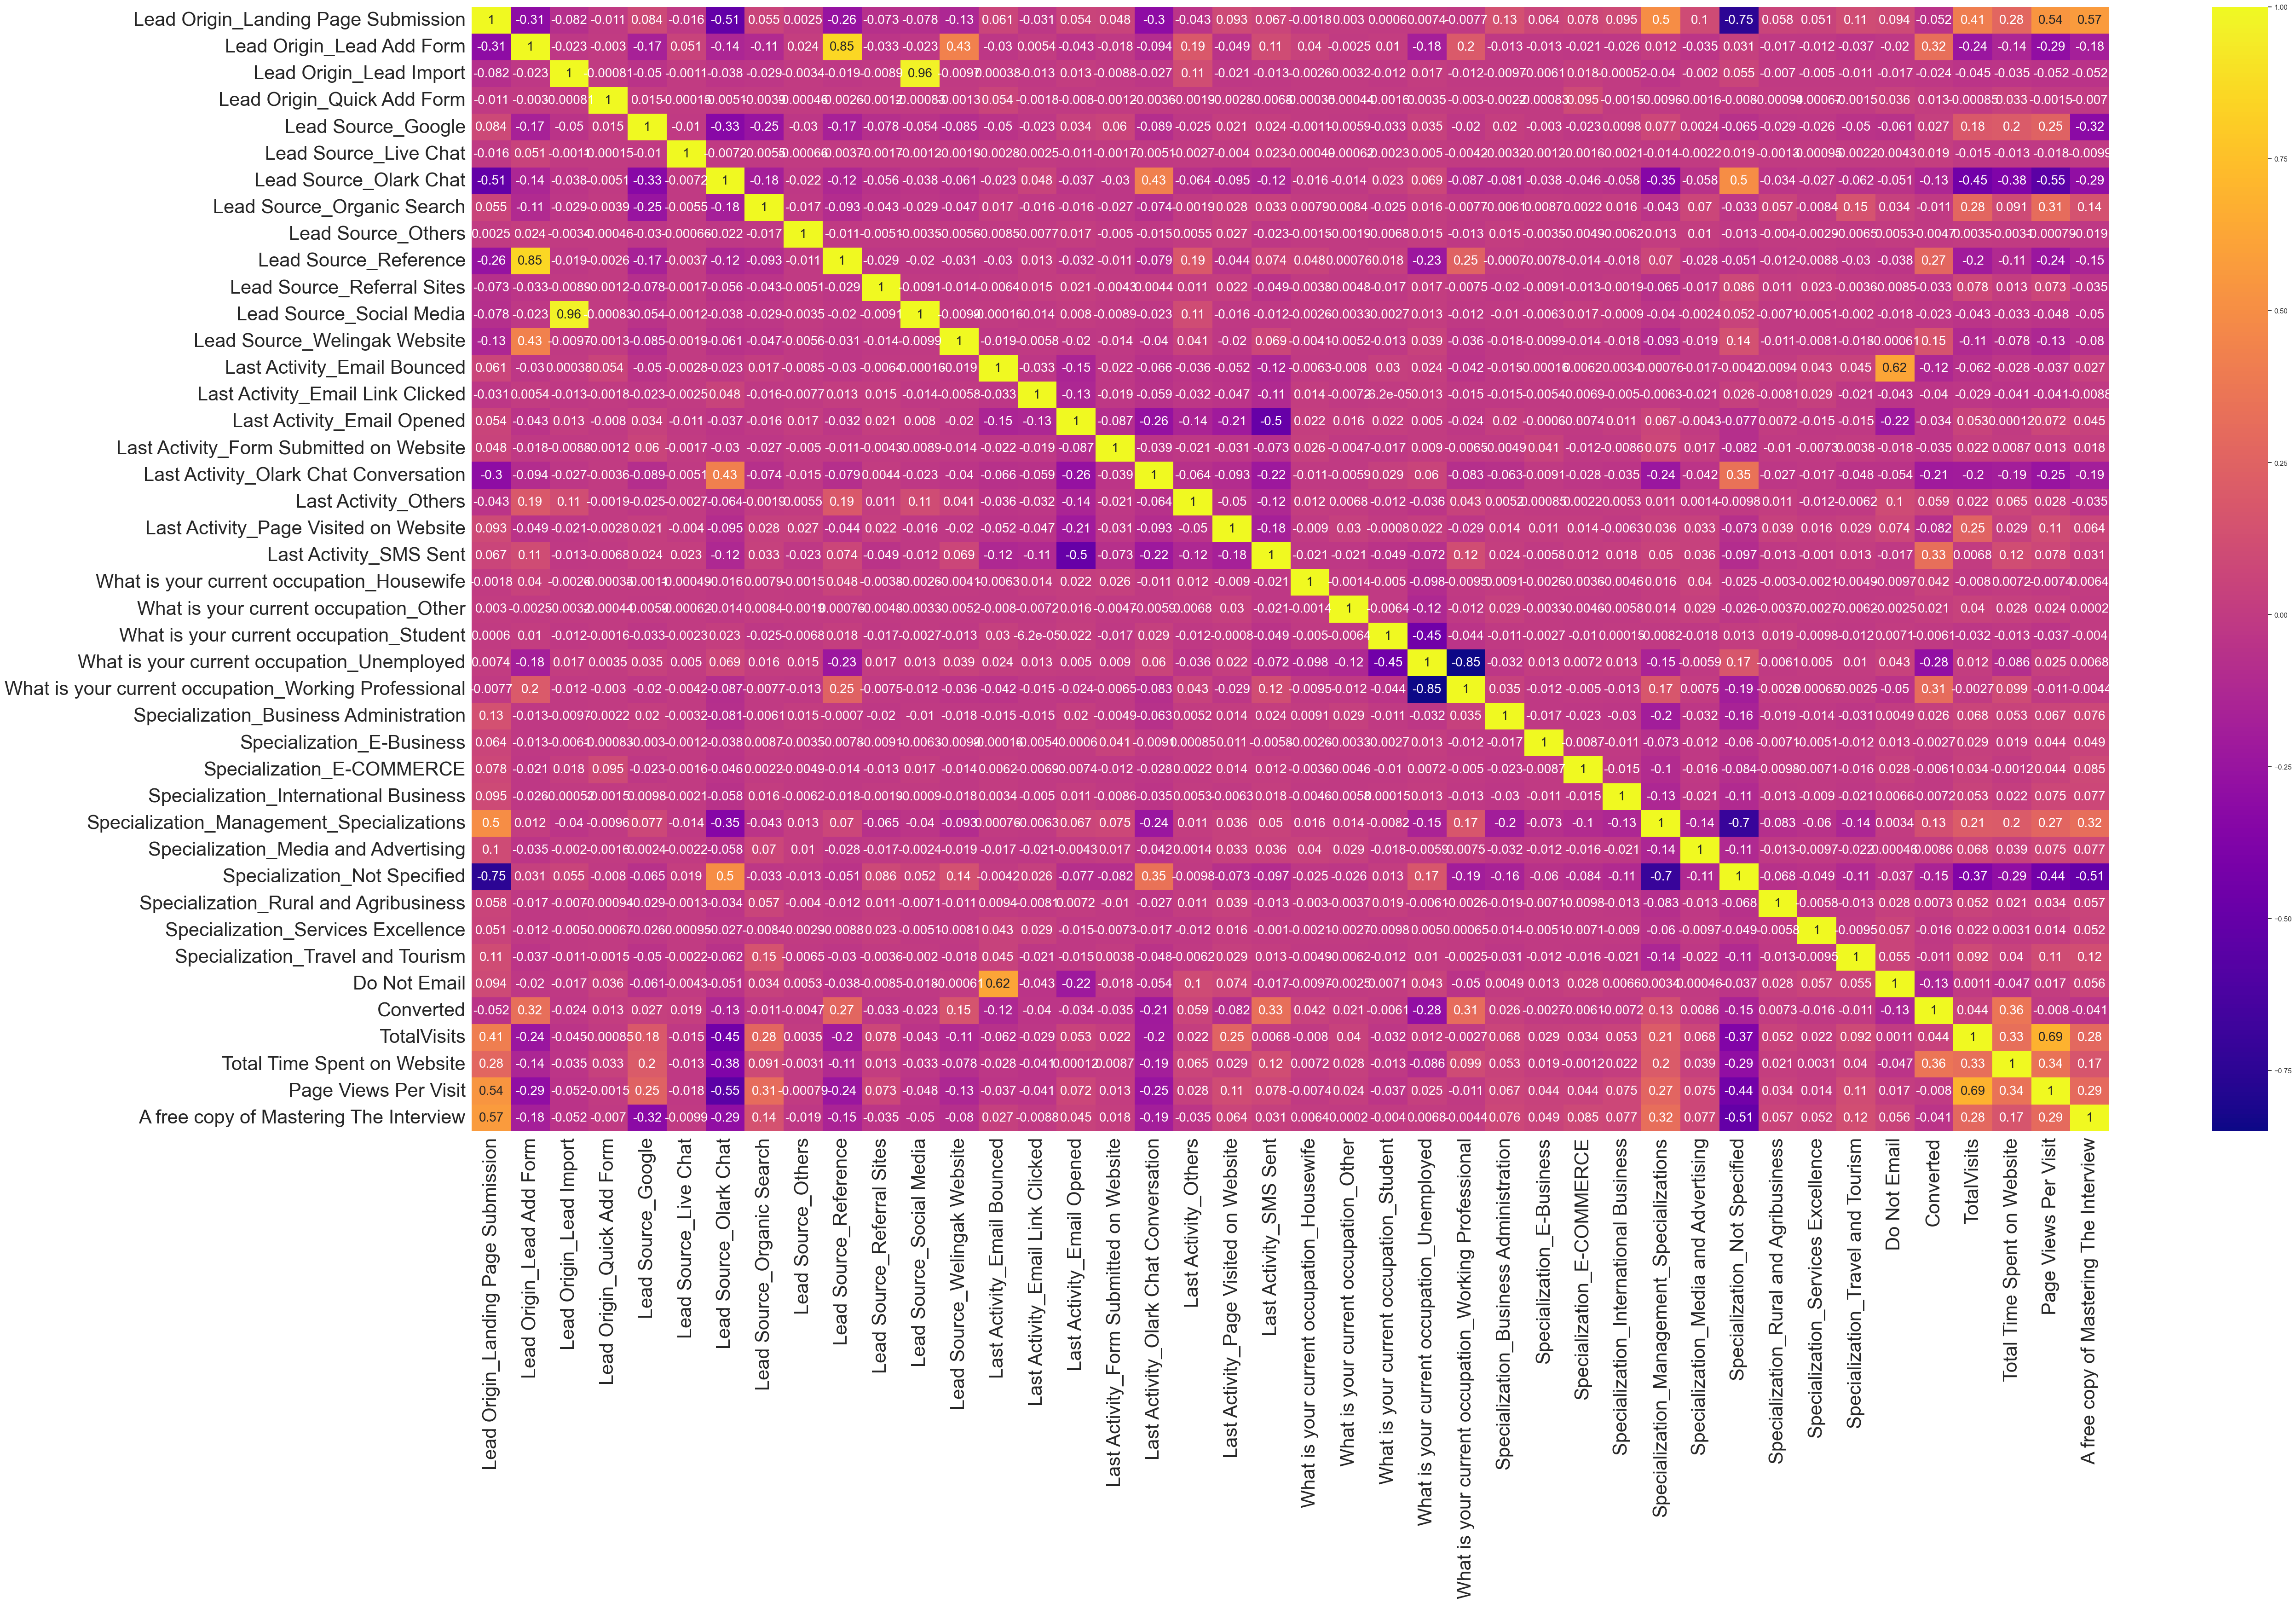

In [107]:
# Let's check the correlation coefficients to see which variables are highly correlated:-

plt.figure(figsize = (55, 35),dpi=100)
sns.heatmap(leads_df.corr(), annot = True, cmap="plasma",annot_kws={"size": 20})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

### Observations
This observation provides valuable insights into the correlation between different variables in the dataset, which can be used for building a logistic regression model. Here's a summary of the key points:

1. 'Lead Source_Facebook' and 'Lead Origin_Lead Import' have a high correlation of 0.98, indicating a strong relationship between these variables.

2. Similarly, 'Do Not Email' and 'Last Activity_Email Bounced' exhibit a high correlation, suggesting that these variables may influence each other.

3. 'Lead Origin_Lead Add Form' and 'Lead Source_Reference' have a correlation of 0.85, indicating a strong relationship between the method of lead generation and the source of reference.

4. The variables 'TotalVisits' and 'Page Views Per Visit' show a correlation of 0.72, indicating a moderate positive relationship between the total number of visits and the number of page views per visit.

5. 'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent', and 'What is your current Occupation_Working Professionals' exhibit positive correlation with the target variable 'Converted', suggesting that these factors may influence the likelihood of conversion.

# Step 7: Model Building


### Model Building using Stats Model & RFE


In [108]:
# Creating LogisticRegression Object called 'regressor'
logreg = LogisticRegression()

### Using RFE for feature elimination


In [109]:
rfe = RFE(logreg, step= 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [110]:
#Displaying columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Origin_Quick Add Form', False, 3),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Live Chat', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Others', False, 3),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Social Media', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 3),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 3),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 2),
 ('Last Activity_SMS Sent', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', 

In [111]:
#Now Storing columns selected by RFE into 'column' and displaying it
column = X_train.columns[rfe.support_]
column

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_E-Business', 'Specialization_Not Specified',
       'Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [112]:
# Displaying columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'TotalVisits',
       'Page Views Per Visit'],
      dtype='object')

In [113]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[column]

### Manual feature elimination


### Running First Training Model


## Model 1

In [114]:
#Starting with all the columns selected by RFE .

# Add a constant
X_train_sm = sm.add_constant(X_train_rfe)

# Building first fitted model
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()

In [115]:
# Print a summary of the logistic regression model obtained
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6415
Model:                            GLM   Df Residuals:                     6394
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2686.5
Date:                Tue, 16 Apr 2024   Deviance:                       5373.1
Time:                        22:38:47   Pearson chi2:                 7.47e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3893
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7313      1.281      0.571      0.568      -1.778       3.241
Lead Origin_Landing Page Submission                     -0.9878      0.128     -7.709      0.000      -1.239      -0.737
Lead Origin_Lead Add Form                                2.6235      0.494      5.316      0.000       1.656       3.591
Lead Source_Olark Chat                                   1.0776      0.121      8.872      0.000       0.840       1.316
Lead Source_Reference                                    0.4118      0.525      0.785      0.433      -0.617       1.440
Lead Source_Welingak Website                             2.9855      0.871      3.429      0.001       1.279       4.692
Last Activity_Email Link Clicked                         0.1907      0.234      0.815      0.415      -0.268       0.649
Last Activity_Email Opened                               0.6989      0.118      5.942      0.000       0.468       0.929
Last Activity_Olark Chat Conversation                   -0.9016      0.198     -4.556      0.000      -1.290      -0.514
Last Activity_Others                                     1.1960      0.233      5.136      0.000       0.740       1.652
Last Activity_SMS Sent                                   1.8666      0.119     15.687      0.000       1.633       2.100
What is your current occupation_Housewife               19.5539   1.18e+04      0.002      0.999   -2.32e+04    2.32e+04
What is your current occupation_Other                   -0.8440      1.466     -0.576      0.565      -3.717       2.029
What is your current occupation_Student                 -1.1735      1.296     -0.905      0.365      -3.714       1.367
What is your current occupation_Unemployed              -1.6144      1.278     -1.263      0.207      -4.119       0.891
What is your current occupation_Working Professional     0.9300      1.290      0.721      0.471      -1.598       3.458
Specialization_E-Business                                0.4682      0.446      1.049      0.294      -0.406       1.343
Specialization_Not Specified                            -1.2493      0.121    -10.285      0.000      -1.487      -1.011
Do Not Email                                            -1.3929      0.180     -7.738      0.000      -1.746      -1.040
Total Time Spent on Website                              1.0578      0.039     26.904      0.000       0.981       1.135
A free copy of Mastering The Interview                  -0.3068      0.087     -3.522      0.000      -0.477      -0.136
========================================================================================================================
"""

In [116]:
# Creating dataframe called 'vif' containing names feature variables and their respective VIFs:-

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                              Lead Origin_Lead Add Form  17.66
13            What is your current occupation_Unemployed  16.77
3                                  Lead Source_Reference  14.14
0                    Lead Origin_Landing Page Submission   7.53
16                          Specialization_Not Specified   4.65
4                           Lead Source_Welingak Website   4.22
6                             Last Activity_Email Opened   3.81
9                                 Last Activity_SMS Sent   3.15
2                                 Lead Source_Olark Chat   2.38
19                A free copy of Mastering The Interview   2.25
14  What is your current occupation_Working Professional   2.18
7                  Last Activity_Olark Chat Conversation   2.11
12               What is your current occupation_Student   1.45
8                                   Last Activity_Others   1.28
17                                          Do Not Email   1.28
18                           Total Time Spent on Website   1.27
5                       Last Activity_Email Link Clicked   1.24
11                 What is your current occupation_Other   1.02
15                             Specialization_E-Business   1.01
10             What is your current occupation_Housewife   1.01

The VIFs higher than 10 can be drop. so let's drop the ones with the high p-values beginning with Lead Origin_Lead Add Form

## Dropping insignificant column and updating the model


In [117]:
#Dropping 'Lead Origin_Lead Add Form' because of insignificant variable p-value=0.999(p>0.05):-
X_train_new = X_train_rfe.drop("Lead Origin_Lead Add Form", axis=1)

## Model 2


In [118]:
# Adding a constant

X_train_sm2 = sm.add_constant(X_train_new)

# Building second fitted model

logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial()).fit()

In [119]:
# Printing a summary of the logistic regression model obtained
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6415
Model:                            GLM   Df Residuals:                     6395
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2703.7
Date:                Tue, 16 Apr 2024   Deviance:                       5407.3
Time:                        22:38:47   Pearson chi2:                 7.47e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3860
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7766      1.281      0.606      0.544      -1.735       3.288
Lead Origin_Landing Page Submission                     -1.0694      0.127     -8.422      0.000      -1.318      -0.821
Lead Source_Olark Chat                                   0.9954      0.120      8.322      0.000       0.761       1.230
Lead Source_Reference                                    2.9363      0.216     13.575      0.000       2.512       3.360
Lead Source_Welingak Website                             5.5148      0.728      7.572      0.000       4.087       6.942
Last Activity_Email Link Clicked                         0.1853      0.233      0.794      0.427      -0.272       0.643
Last Activity_Email Opened                               0.6986      0.117      5.980      0.000       0.470       0.928
Last Activity_Olark Chat Conversation                   -0.9160      0.197     -4.646      0.000      -1.302      -0.530
Last Activity_Others                                     1.2314      0.232      5.319      0.000       0.778       1.685
Last Activity_SMS Sent                                   1.8749      0.118     15.855      0.000       1.643       2.107
What is your current occupation_Housewife               19.5961   1.18e+04      0.002      0.999   -2.32e+04    2.32e+04
What is your current occupation_Other                   -0.8145      1.466     -0.555      0.579      -3.689       2.060
What is your current occupation_Student                 -1.1216      1.297     -0.865      0.387      -3.663       1.420
What is your current occupation_Unemployed              -1.5738      1.279     -1.231      0.218      -4.080       0.933
What is your current occupation_Working Professional     0.9617      1.290      0.745      0.456      -1.568       3.491
Specialization_E-Business                                0.4663      0.444      1.049      0.294      -0.405       1.337
Specialization_Not Specified                            -1.2666      0.121    -10.482      0.000      -1.503      -1.030
Do Not Email                                            -1.3372      0.178     -7.497      0.000      -1.687      -0.988
Total Time Spent on Website                              1.0405      0.039     26.701      0.000       0.964       1.117
A free copy of Mastering The Interview                  -0.3127      0.087     -3.601      0.000      -0.483      -0.142
========================================================================================================================
"""

In [120]:
# Calculating VIF for new model

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
12            What is your current occupation_Unemployed  16.64
0                    Lead Origin_Landing Page Submission   7.44
15                          Specialization_Not Specified   4.64
5                             Last Activity_Email Opened   3.81
8                                 Last Activity_SMS Sent   3.15
1                                 Lead Source_Olark Chat   2.37
18                A free copy of Mastering The Interview   2.25
13  What is your current occupation_Working Professional   2.17
6                  Last Activity_Olark Chat Conversation   2.11
2                                  Lead Source_Reference   1.62
11               What is your current occupation_Student   1.45
7                                   Last Activity_Others   1.28
16                                          Do Not Email   1.27
17                           Total Time Spent on Website   1.27
4                       Last Activity_Email Link Clicked   1.24
3                           Lead Source_Welingak Website   1.10
10                 What is your current occupation_Other   1.02
14                             Specialization_E-Business   1.01
9              What is your current occupation_Housewife   1.01

The VIFs are now all less than 10. So let's drop the ones with the high p-values which is 'What is your current occupation_Unemployed'

### Dropping insignificant column and updating the model


In [121]:
#Dropping 'What is your current occupation_Unemployed' because of  p-value=0.01
X_train_new = X_train_new.drop(["What is your current occupation_Unemployed"], axis = 1)

## Model 3


In [122]:
#Adding constant

X_train_sm3 = sm.add_constant(X_train_new)

# Create a third fitted model

logm3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial()).fit()

In [123]:
# Printing a summary of the logistic regression model obtained
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6415
Model:                            GLM   Df Residuals:                     6396
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2704.5
Date:                Tue, 16 Apr 2024   Deviance:                       5409.1
Time:                        22:38:47   Pearson chi2:                 7.49e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3859
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7894      0.150     -5.253      0.000      -1.084      -0.495
Lead Origin_Landing Page Submission                     -1.0767      0.127     -8.484      0.000      -1.325      -0.828
Lead Source_Olark Chat                                   0.9945      0.120      8.315      0.000       0.760       1.229
Lead Source_Reference                                    2.9355      0.216     13.573      0.000       2.512       3.359
Lead Source_Welingak Website                             5.5136      0.728      7.570      0.000       4.086       6.941
Last Activity_Email Link Clicked                         0.1855      0.233      0.795      0.427      -0.272       0.643
Last Activity_Email Opened                               0.7005      0.117      5.995      0.000       0.471       0.929
Last Activity_Olark Chat Conversation                   -0.9079      0.197     -4.612      0.000      -1.294      -0.522
Last Activity_Others                                     1.2386      0.231      5.364      0.000       0.786       1.691
Last Activity_SMS Sent                                   1.8753      0.118     15.856      0.000       1.644       2.107
What is your current occupation_Housewife               21.1672   1.18e+04      0.002      0.999   -2.31e+04    2.32e+04
What is your current occupation_Other                    0.7549      0.724      1.042      0.297      -0.665       2.174
What is your current occupation_Student                  0.4507      0.222      2.032      0.042       0.016       0.885
What is your current occupation_Working Professional     2.5335      0.184     13.775      0.000       2.173       2.894
Specialization_E-Business                                0.4652      0.444      1.047      0.295      -0.406       1.336
Specialization_Not Specified                            -1.2750      0.121    -10.560      0.000      -1.512      -1.038
Do Not Email                                            -1.3384      0.178     -7.502      0.000      -1.688      -0.989
Total Time Spent on Website                              1.0406      0.039     26.715      0.000       0.964       1.117
A free copy of Mastering The Interview                  -0.3146      0.087     -3.624      0.000      -0.485      -0.144
========================================================================================================================
"""

In [124]:
# Calculating VIF for new model:-

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                    Lead Origin_Landing Page Submission  4.00
5                             Last Activity_Email Opened  2.72
14                          Specialization_Not Specified  2.70
8                                 Last Activity_SMS Sent  2.39
1                                 Lead Source_Olark Chat  2.25
17                A free copy of Mastering The Interview  2.21
6                  Last Activity_Olark Chat Conversation  1.86
2                                  Lead Source_Reference  1.41
16                           Total Time Spent on Website  1.26
7                                   Last Activity_Others  1.22
15                                          Do Not Email  1.21
12  What is your current occupation_Working Professional  1.20
4                       Last Activity_Email Link Clicked  1.16
3                           Lead Source_Welingak Website  1.09
11               What is your current occupation_Student  1.03
10                 What is your current occupation_Other  1.01
13                             Specialization_E-Business  1.01
9              What is your current occupation_Housewife  1.01

The VIFs are now all less than 10. So let's drop the ones with the high p-values =0.999 of the variable 'Lead Origin_Landing Page Submission'	

###  Dropping Insignificant Variable

In [125]:
# Dropping 'Lead Origin_Landing Page Submission' because of p-value > 0.05
X_train_new = X_train_new.drop(["Lead Origin_Landing Page Submission"], axis = 1)

## Model 4

In [126]:
#Adding constant

X_train_sm4 = sm.add_constant(X_train_new)

# Create a third fitted model

logm4 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial()).fit()

In [127]:
# Printing a summary of the logistic regression model obtained:-

logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6415
Model:                            GLM   Df Residuals:                     6397
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.4
Date:                Tue, 16 Apr 2024   Deviance:                       5482.8
Time:                        22:38:48   Pearson chi2:                 7.24e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3788
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6223      0.115    -14.066      0.000      -1.848      -1.396
Lead Source_Olark Chat                                   1.3286      0.113     11.738      0.000       1.107       1.550
Lead Source_Reference                                    3.4982      0.205     17.055      0.000       3.096       3.900
Lead Source_Welingak Website                             5.7818      0.727      7.958      0.000       4.358       7.206
Last Activity_Email Link Clicked                         0.1461      0.232      0.630      0.529      -0.308       0.601
Last Activity_Email Opened                               0.6803      0.116      5.861      0.000       0.453       0.908
Last Activity_Olark Chat Conversation                   -0.8768      0.194     -4.515      0.000      -1.257      -0.496
Last Activity_Others                                     1.2351      0.231      5.339      0.000       0.782       1.689
Last Activity_SMS Sent                                   1.8313      0.117     15.615      0.000       1.601       2.061
What is your current occupation_Housewife               21.0645   1.23e+04      0.002      0.999    -2.4e+04    2.41e+04
What is your current occupation_Other                    0.9106      0.708      1.286      0.198      -0.477       2.299
What is your current occupation_Student                  0.4005      0.217      1.844      0.065      -0.025       0.826
What is your current occupation_Working Professional     2.5788      0.180     14.322      0.000       2.226       2.932
Specialization_E-Business                                0.3835      0.446      0.860      0.390      -0.491       1.258
Specialization_Not Specified                            -0.6290      0.092     -6.833      0.000      -0.809      -0.449
Do Not Email                                            -1.3728      0.176     -7.821      0.000      -1.717      -1.029
Total Time Spent on Website                              1.0537      0.039     27.171      0.000       0.978       1.130
A free copy of Mastering The Interview                  -0.4896      0.084     -5.849      0.000      -0.654      -0.326
========================================================================================================================
"""

In [128]:
# Calculating VIF for new model4

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
13                          Specialization_Not Specified  2.43
0                                 Lead Source_Olark Chat  2.12
4                             Last Activity_Email Opened  1.77
16                A free copy of Mastering The Interview  1.71
7                                 Last Activity_SMS Sent  1.66
5                  Last Activity_Olark Chat Conversation  1.65
1                                  Lead Source_Reference  1.30
15                           Total Time Spent on Website  1.26
11  What is your current occupation_Working Professional  1.20
6                                   Last Activity_Others  1.16
14                                          Do Not Email  1.12
3                       Last Activity_Email Link Clicked  1.09
2                           Lead Source_Welingak Website  1.08
10               What is your current occupation_Student  1.03
9                  What is your current occupation_Other  1.01
12                             Specialization_E-Business  1.01
8              What is your current occupation_Housewife  1.01

The VIFs are now all less than 5. So let's drop the ones with the high p-values =0.999 of the variable 'What is your current occupation_Housewife'	

In [129]:
#Dropping 'What is your current occupation_Housewife' because of  p-value=.05

X_train_new = X_train_new.drop(["What is your current occupation_Housewife"], axis = 1)

## Model 5

In [130]:
#Adding constant:-

X_train_sm5 = sm.add_constant(X_train_new)

# Create a third fitted model:-

logm5 = sm.GLM(y_train,X_train_sm5, family = sm.families.Binomial()).fit()


In [131]:
# Print a summary of the logistic regression model obtained:-

logm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6415
Model:                            GLM   Df Residuals:                     6398
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.2
Date:                Tue, 16 Apr 2024   Deviance:                       5486.5
Time:                        22:38:48   Pearson chi2:                 7.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3784
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6129      0.115    -14.023      0.000      -1.838      -1.387
Lead Source_Olark Chat                                   1.3293      0.113     11.745      0.000       1.108       1.551
Lead Source_Reference                                    3.5131      0.205     17.153      0.000       3.112       3.915
Lead Source_Welingak Website                             5.7831      0.727      7.960      0.000       4.359       7.207
Last Activity_Email Link Clicked                         0.1374      0.232      0.592      0.554      -0.317       0.592
Last Activity_Email Opened                               0.6730      0.116      5.810      0.000       0.446       0.900
Last Activity_Olark Chat Conversation                   -0.8840      0.194     -4.555      0.000      -1.264      -0.504
Last Activity_Others                                     1.2283      0.231      5.313      0.000       0.775       1.681
Last Activity_SMS Sent                                   1.8233      0.117     15.578      0.000       1.594       2.053
What is your current occupation_Other                    0.9086      0.708      1.283      0.199      -0.479       2.297
What is your current occupation_Student                  0.3982      0.217      1.833      0.067      -0.028       0.824
What is your current occupation_Working Professional     2.5761      0.180     14.309      0.000       2.223       2.929
Specialization_E-Business                                0.3811      0.446      0.854      0.393      -0.493       1.255
Specialization_Not Specified                            -0.6321      0.092     -6.868      0.000      -0.813      -0.452
Do Not Email                                            -1.3764      0.176     -7.842      0.000      -1.720      -1.032
Total Time Spent on Website                              1.0536      0.039     27.173      0.000       0.978       1.130
A free copy of Mastering The Interview                  -0.4912      0.084     -5.873      0.000      -0.655      -0.327
========================================================================================================================
"""

In [132]:
# Calculating VIF for new model:-

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12                          Specialization_Not Specified  2.43
0                                 Lead Source_Olark Chat  2.12
4                             Last Activity_Email Opened  1.77
15                A free copy of Mastering The Interview  1.71
7                                 Last Activity_SMS Sent  1.66
5                  Last Activity_Olark Chat Conversation  1.65
1                                  Lead Source_Reference  1.30
14                           Total Time Spent on Website  1.26
10  What is your current occupation_Working Professional  1.20
6                                   Last Activity_Others  1.16
13                                          Do Not Email  1.12
3                       Last Activity_Email Link Clicked  1.09
2                           Lead Source_Welingak Website  1.08
9                What is your current occupation_Student  1.03
8                  What is your current occupation_Other  1.01
11                             Specialization_E-Business  1.01

## Dropping insignificant column 

In [133]:
#Dropping 'Last Activity_Email Link Clicked' because of  p-value=0.5

X_train_new = X_train_new.drop(["Last Activity_Email Link Clicked"], axis = 1)

## Model 6

In [134]:
#Adding constant

X_train_sm6 = sm.add_constant(X_train_new)

# Create a third fitted model

logm6 = sm.GLM(y_train,X_train_sm6, family = sm.families.Binomial()).fit()

In [135]:
# Print a summary of the logistic regression model obtained:-

logm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6415
Model:                            GLM   Df Residuals:                     6399
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.4
Date:                Tue, 16 Apr 2024   Deviance:                       5486.8
Time:                        22:38:48   Pearson chi2:                 7.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3784
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5873      0.106    -14.960      0.000      -1.795      -1.379
Lead Source_Olark Chat                                   1.3356      0.113     11.845      0.000       1.115       1.557
Lead Source_Reference                                    3.5216      0.204     17.222      0.000       3.121       3.922
Lead Source_Welingak Website                             5.7875      0.727      7.965      0.000       4.363       7.212
Last Activity_Email Opened                               0.6455      0.106      6.106      0.000       0.438       0.853
Last Activity_Olark Chat Conversation                   -0.9144      0.187     -4.890      0.000      -1.281      -0.548
Last Activity_Others                                     1.2035      0.227      5.296      0.000       0.758       1.649
Last Activity_SMS Sent                                   1.7967      0.108     16.694      0.000       1.586       2.008
What is your current occupation_Other                    0.9078      0.708      1.282      0.200      -0.480       2.296
What is your current occupation_Student                  0.3980      0.217      1.832      0.067      -0.028       0.824
What is your current occupation_Working Professional     2.5741      0.180     14.309      0.000       2.222       2.927
Specialization_E-Business                                0.3806      0.445      0.855      0.393      -0.492       1.253
Specialization_Not Specified                            -0.6315      0.092     -6.863      0.000      -0.812      -0.451
Do Not Email                                            -1.3865      0.175     -7.945      0.000      -1.729      -1.044
Total Time Spent on Website                              1.0535      0.039     27.175      0.000       0.977       1.129
A free copy of Mastering The Interview                  -0.4904      0.084     -5.865      0.000      -0.654      -0.326
========================================================================================================================
"""

In [136]:
# Calculating VIF for new model:-

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11                          Specialization_Not Specified  2.36
0                                 Lead Source_Olark Chat  2.09
3                             Last Activity_Email Opened  1.71
14                A free copy of Mastering The Interview  1.64
4                  Last Activity_Olark Chat Conversation  1.61
6                                 Last Activity_SMS Sent  1.61
1                                  Lead Source_Reference  1.28
13                           Total Time Spent on Website  1.26
9   What is your current occupation_Working Professional  1.20
5                                   Last Activity_Others  1.15
12                                          Do Not Email  1.11
2                           Lead Source_Welingak Website  1.08
8                What is your current occupation_Student  1.03
7                  What is your current occupation_Other  1.01
10                             Specialization_E-Business  1.01

In [137]:
#Dropping 'Specialization_E-Business because of high  p-value

X_train_new = X_train_new.drop(["Specialization_E-Business"], axis = 1)

## Model 7

In [138]:
#Adding constant:-

X_train_sm7 = sm.add_constant(X_train_new)

# Create a third fitted model:-

logm7 = sm.GLM(y_train,X_train_sm7, family = sm.families.Binomial()).fit()

In [139]:
# Print a summary of the logistic regression model obtained:-

logm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6415
Model:                            GLM   Df Residuals:                     6400
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.8
Date:                Tue, 16 Apr 2024   Deviance:                       5487.5
Time:                        22:38:48   Pearson chi2:                 7.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3783
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5841      0.106    -14.939      0.000      -1.792      -1.376
Lead Source_Olark Chat                                   1.3349      0.113     11.840      0.000       1.114       1.556
Lead Source_Reference                                    3.5234      0.204     17.234      0.000       3.123       3.924
Lead Source_Welingak Website                             5.7870      0.727      7.965      0.000       4.363       7.211
Last Activity_Email Opened                               0.6460      0.106      6.111      0.000       0.439       0.853
Last Activity_Olark Chat Conversation                   -0.9144      0.187     -4.890      0.000      -1.281      -0.548
Last Activity_Others                                     1.2004      0.227      5.284      0.000       0.755       1.646
Last Activity_SMS Sent                                   1.7955      0.108     16.687      0.000       1.585       2.006
What is your current occupation_Other                    0.9036      0.708      1.276      0.202      -0.484       2.291
What is your current occupation_Student                  0.3997      0.217      1.840      0.066      -0.026       0.825
What is your current occupation_Working Professional     2.5711      0.180     14.295      0.000       2.219       2.924
Specialization_Not Specified                            -0.6342      0.092     -6.897      0.000      -0.814      -0.454
Do Not Email                                            -1.3843      0.174     -7.936      0.000      -1.726      -1.042
Total Time Spent on Website                              1.0538      0.039     27.184      0.000       0.978       1.130
A free copy of Mastering The Interview                  -0.4899      0.084     -5.859      0.000      -0.654      -0.326
========================================================================================================================
"""

In [140]:
# Calculating VIF for new model7

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10                          Specialization_Not Specified  2.36
0                                 Lead Source_Olark Chat  2.09
3                             Last Activity_Email Opened  1.71
13                A free copy of Mastering The Interview  1.64
4                  Last Activity_Olark Chat Conversation  1.61
6                                 Last Activity_SMS Sent  1.61
1                                  Lead Source_Reference  1.28
12                           Total Time Spent on Website  1.26
9   What is your current occupation_Working Professional  1.20
5                                   Last Activity_Others  1.15
11                                          Do Not Email  1.11
2                           Lead Source_Welingak Website  1.08
8                What is your current occupation_Student  1.03
7                  What is your current occupation_Other  1.01

In [141]:
#Dropping 'What is your current occupation_Other' because of High p-value

X_train_new = X_train_new.drop(["What is your current occupation_Other"], axis = 1)

## Model 8

In [142]:
#Adding constant:-

X_train_sm8 = sm.add_constant(X_train_new)

# Create a third fitted model:-

logm8 = sm.GLM(y_train,X_train_sm8, family = sm.families.Binomial()).fit()

In [143]:
# Print a summary of the logistic regression model obtained:-

logm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6415
Model:                            GLM   Df Residuals:                     6401
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2744.6
Date:                Tue, 16 Apr 2024   Deviance:                       5489.2
Time:                        22:38:48   Pearson chi2:                 7.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3781
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5812      0.106    -14.919      0.000      -1.789      -1.373
Lead Source_Olark Chat                                   1.3366      0.113     11.854      0.000       1.116       1.558
Lead Source_Reference                                    3.5224      0.204     17.230      0.000       3.122       3.923
Lead Source_Welingak Website                             5.7878      0.727      7.966      0.000       4.364       7.212
Last Activity_Email Opened                               0.6490      0.106      6.142      0.000       0.442       0.856
Last Activity_Olark Chat Conversation                   -0.9096      0.187     -4.866      0.000      -1.276      -0.543
Last Activity_Others                                     1.1983      0.227      5.274      0.000       0.753       1.644
Last Activity_SMS Sent                                   1.7945      0.108     16.679      0.000       1.584       2.005
What is your current occupation_Student                  0.3966      0.217      1.826      0.068      -0.029       0.822
What is your current occupation_Working Professional     2.5679      0.180     14.279      0.000       2.215       2.920
Specialization_Not Specified                            -0.6390      0.092     -6.954      0.000      -0.819      -0.459
Do Not Email                                            -1.3791      0.174     -7.912      0.000      -1.721      -1.037
Total Time Spent on Website                              1.0551      0.039     27.221      0.000       0.979       1.131
A free copy of Mastering The Interview                  -0.4923      0.084     -5.891      0.000      -0.656      -0.329
========================================================================================================================
"""

In [144]:
# Calculating VIF for new model:-

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9                           Specialization_Not Specified  2.35
0                                 Lead Source_Olark Chat  2.09
3                             Last Activity_Email Opened  1.70
12                A free copy of Mastering The Interview  1.64
4                  Last Activity_Olark Chat Conversation  1.61
6                                 Last Activity_SMS Sent  1.61
1                                  Lead Source_Reference  1.28
11                           Total Time Spent on Website  1.25
8   What is your current occupation_Working Professional  1.19
5                                   Last Activity_Others  1.15
10                                          Do Not Email  1.11
2                           Lead Source_Welingak Website  1.08
7                What is your current occupation_Student  1.03

In [145]:
#Dropping 'What is your current occupation_Student' because of  p-value=0.01

X_train_new = X_train_new.drop(["What is your current occupation_Student"], axis = 1)

Since 'All' the p-values are less than 0.05 and futher modelling is not worth and we can check the Variance Inflation Factor to see if there is any correlation between the variables. So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data.

### The above Model 8 is the final Model.

## Making prediction on 'train' dataset based on final model


In [146]:
# Calculating predicted values of 'y_train'

y_train_pred = logm8.predict(X_train_sm8)
                            
y_train_pred[:7] # Displaying 10 values

1778    0.197408
3020    0.097043
6353    0.203752
511     0.266864
7530    0.146622
3175    0.769213
8151    0.238962
dtype: float64

In [147]:
# Reshaping 

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19740805, 0.09704308, 0.20375206, 0.26686388, 0.14662244,
       0.76921282, 0.2389616 , 0.28632954, 0.78212959, 0.14072385])

## Creating a dataframe with the actual Converted flag and the predicted probabilities


In [148]:
# Creating dataframe 'y_train_pred_final' with actual and predicted :-

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

# Adding column 'Prospect ID' for indexing:-

y_train_pred_final['Prospect ID'] = y_train.index

# Displaying head of created dataframe:-

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.197408         1778
1          1        0.097043         3020
2          0        0.203752         6353
3          0        0.266864          511
4          0        0.146622         7530

# Step 8: Finding Optimal Cutoff Point


The optimal cutoff probability is the point at which we achieve a balance between sensitivity and specificity.

In [149]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.197408         1778    1    1    0    0    0    0    0   
1          1        0.097043         3020    1    0    0    0    0    0    0   
2          0        0.203752         6353    1    1    1    0    0    0    0   
3          0        0.266864          511    1    1    1    0    0    0    0   
4          0        0.146622         7530    1    1    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [150]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.382697     1.000000     0.000000
0.1          0.1  0.594076     0.971894     0.359848
0.2          0.2  0.723772     0.921385     0.601263
0.3          0.3  0.787529     0.829735     0.761364
0.4          0.4  0.807794     0.760489     0.837121
0.5          0.5  0.804209     0.660692     0.893182
0.6          0.6  0.793453     0.580855     0.925253
0.7          0.7  0.774279     0.493686     0.948232
0.8          0.8  0.749493     0.393483     0.970202
0.9          0.9  0.701481     0.236253     0.989899


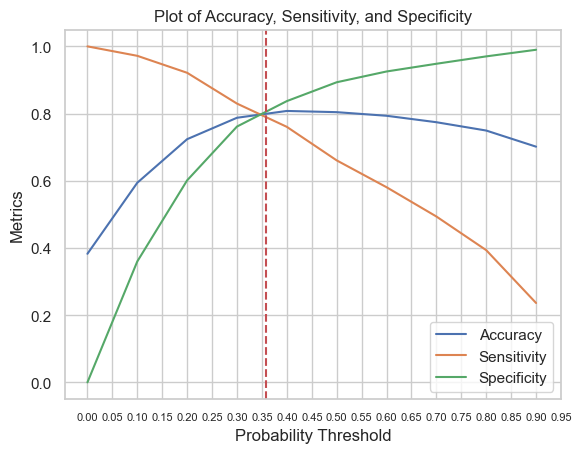

In [151]:
# Plotting accuracy, sensitivity and specificity for various probabilities

#plt.figure(figsize=(20,5))
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
sns.set(style = 'darkgrid')
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.358, color='r', linestyle='--') # additing axline

# Set labels and title
plt.xlabel('Probability Threshold')
plt.ylabel('Metrics')
plt.title('Plot of Accuracy, Sensitivity, and Specificity')

# Display the plot
plt.show()

### Observation:
From the curve above, it seems that 0.358 is optimal cutoff point to take .


In [152]:
# Calculating 'final_predicted' based on 'Converted_Prob' using 0.358 cutoff point
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.358 else 0)

In [153]:
# Dropping the unnecessary columns

y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 

In [154]:
#Displaying the head

y_train_pred_final.head() 

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.197408         1778                0
1          1        0.097043         3020                0
2          0        0.203752         6353                0
3          0        0.266864          511                0
4          0        0.146622         7530                0

## Assigning Lead Scores to Leads Based on Predictions


In [155]:
# Assigning the 'Lead_Score' based on 'Converted_Prob' 

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [156]:
# Selecting only important columns and displaying head of dataframe

y_train_pred_final[['Converted','Converted_Prob','Prospect ID','final_predicted','Lead_Score']].head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0        0.197408         1778                0          20
1          1        0.097043         3020                0          10
2          0        0.203752         6353                0          20
3          0        0.266864          511                0          27
4          0        0.146622         7530                0          15

# Step 9:Model Evaluation


## Confusion Matrix


In [157]:
# Checking Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion

array([[3202,  758],
       [ 500, 1955]], dtype=int64)

 Above is the confusion matrix when we use threshold of probability as 0.5

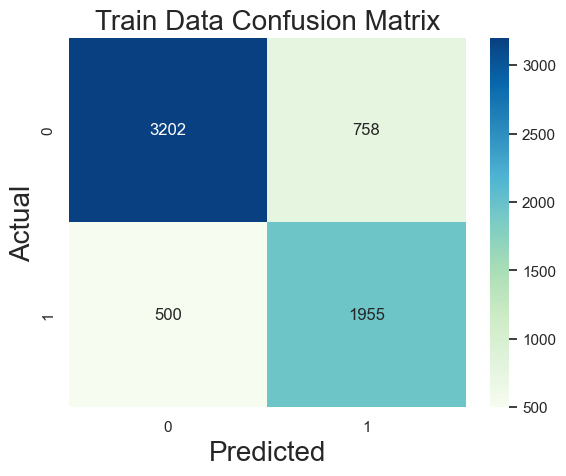

In [158]:
# Plotting confusion matrix
sns.heatmap(confusion, annot=True,fmt='g',cmap='GnBu')
plt.title("Train Data Confusion Matrix", fontsize=20)
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [159]:
# Checking the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8038971161340608

In [160]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [161]:
# Checking the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7963340122199593

In [162]:
# Calculating specificity of the model

TN / float(TN+FP)

0.8085858585858586

In [163]:
# positive predictive value 

print (TP / float(TP+FP))

0.720604496866937


In [164]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8649378714208535


## Precision and Recall


### Precision
#### TP / TP + FP

In [165]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.720604496866937

In [166]:
# Calculating Precision value

precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.720604496866937

### Recall
#### TP / TP + FN

In [167]:
# Calculating 'Recall' 

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7963340122199593

In [168]:
#Calculating Recall value

recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7963340122199593

### Observation
We have the following values for the Train Data:

Accuracy : 80%

Sensitivity : 79%

Specificity : 80%

Pricision: 72%

Recall: 79%

From above data

# Step 10: Plotting the ROC Curve


An ROC curve demonstrates several things:

-> It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

->The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

->The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [169]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [170]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )


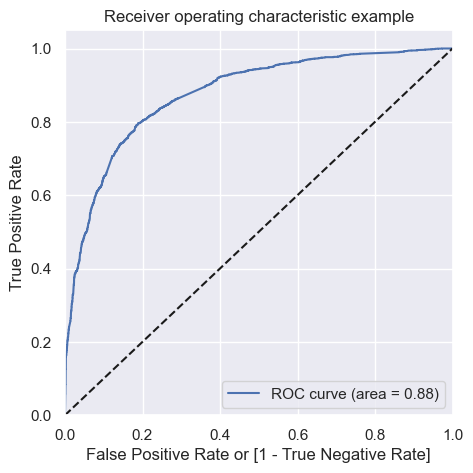

In [171]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Observation

We are getting a decent value of 0.88 indicating a good predictive model.As ROC Curve should be a value close to 1.

## Precision and Recall Tradeoff


In [172]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)


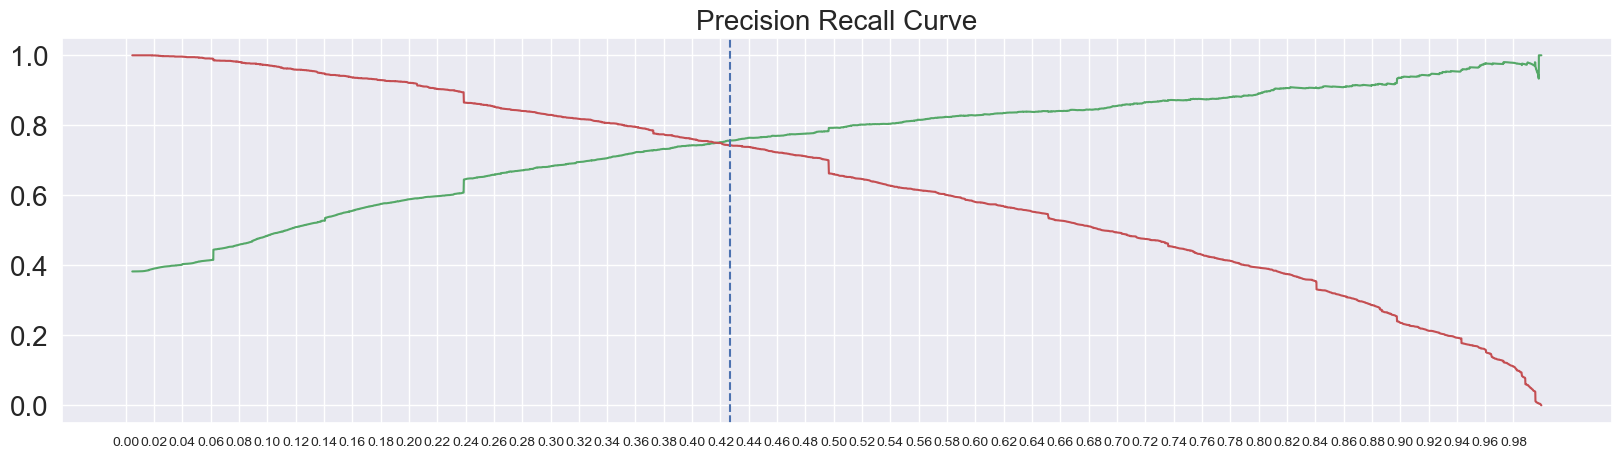

In [173]:
#Plotting the curve
plt.figure(figsize=(20,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Recall Curve',fontsize=20)
plt.axvline(x=0.427, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=10)
plt.yticks(size=20)

plt.show()

### Observation
From above above 'precision_recall_curve' we can see that cutoff point is 0.427.

## Now using this threshold value from 'Precision Recall Tradeoff Curve' for Data Evaluation


In [174]:
# plotting the Train dataset again with 0.427 as cutoff
y_train_pred_final['final_predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.323 else 0)

 # Displaying head 
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score  \
0          0        0.197408         1778                0          20   
1          1        0.097043         3020                0          10   
2          0        0.203752         6353                0          20   
3          0        0.266864          511                0          27   
4          0        0.146622         7530                0          15   

   final_predicted_2  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that

In [175]:
# Confusion matrix

confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)
confusion_2

array([[3084,  876],
       [ 448, 2007]], dtype=int64)

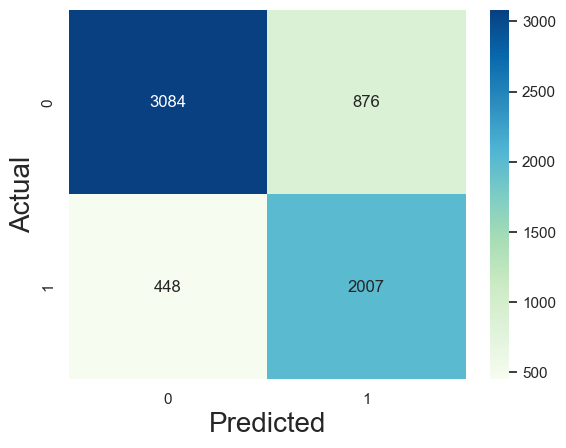

In [176]:
# Plotting confusion matrix
sns.heatmap(confusion_2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [177]:
# Check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)

0.7936087295401403

In [178]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [179]:
# Checking the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8175152749490835

In [180]:
# Calculating specificity

TN / float(TN+FP)

0.7787878787878788

In [181]:
# positive predictive value 

TP / float(TP+FP)

0.696149843912591

In [182]:
# Negative predictive value
TN / float(TN+ FN)

0.8731596828992072

In [183]:
# Calculating Pricision value

confusion_2[1,1]/(confusion_2[0,1]+confusion_2[1,1])

0.696149843912591

In [184]:
# Calculating 'Recall' Value

confusion_2[1,1]/(confusion_2[1,0]+confusion_2[1,1])

0.8175152749490835

### Observations:

- The Precision-Recall trade-off method resulted in a decrease in True Positive and an increase in True Negative numbers.
- This indicates that the model's performance at the selected cut-off point may not be optimal.
- The decrease in True Positive numbers resulted in a reduction in Sensitivity (Recall)
- To increase the number of True Positives and improve Sensitivity (Recall), and we will use cut-off point of 0.358.

# Step 11: Making predictions on the test set


## Applying scaling on test data


In [185]:
# Applying 'transform' to scale the 'test' data set
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])


In [186]:
# Predicting using values used by the final model i.e. logm14

test_col = X_train_sm8.columns

X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe:-
X_test = sm.add_constant(X_test)

X_test.info() #Displaying info about columns


<class 'pandas.core.frame.DataFrame'>
Index: 2750 entries, 1124 to 1859
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 2750 non-null   float64
 1   Lead Source_Olark Chat                                2750 non-null   int32  
 2   Lead Source_Reference                                 2750 non-null   int32  
 3   Lead Source_Welingak Website                          2750 non-null   int32  
 4   Last Activity_Email Opened                            2750 non-null   int32  
 5   Last Activity_Olark Chat Conversation                 2750 non-null   int32  
 6   Last Activity_Others                                  2750 non-null   int32  
 7   Last Activity_SMS Sent                                2750 non-null   int32  
 8   What is your current occupation_Student               2750 n

## Making Predictions on the X_test dataset using the final model


In [187]:
# Predicting on test data set using final model 

y_test_pred = logm8.predict(X_test)

In [188]:
# Checking top 10 rows

y_test_pred[:10]

1124    0.303593
4778    0.985691
1012    0.169345
3103    0.298306
5094    0.238621
7994    0.535111
4078    0.261834
3732    0.152264
6718    0.023706
7840    0.948980
dtype: float64

In [189]:
# Converting y_test_pred to a dataframe 

y_pred_1 = pd.DataFrame(y_test_pred)

In [190]:
# Let's see the head
y_pred_1.head()

0
1124  0.303593
4778  0.985691
1012  0.169345
3103  0.298306
5094  0.238621

In [191]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [192]:
# Putting 'Prospect ID' to index

y_test_df['Prospect ID'] = y_test_df.index

In [193]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [194]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [195]:
# Displaying head of 'y_pred_final' 

y_pred_final.head()

Converted  Prospect ID         0
0          0         1124  0.303593
1          0         4778  0.985691
2          0         1012  0.169345
3          1         3103  0.298306
4          0         5094  0.238621

In [196]:
# Renaming the column '0' as 'Converted_Prob'

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [197]:
# Rearranging the columns

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob']]

In [198]:
#Assigning 'Lead Score' to dataframe 'y_pred_final'

y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [199]:
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  Lead_Score
0         1124          0        0.303593          30
1         4778          0        0.985691          99
2         1012          0        0.169345          17
3         3103          1        0.298306          30
4         5094          0        0.238621          24

### Using Cutoff point of 0.358 from Sentivity - Specificity - Accuracy plot cut-off point

In [200]:
# Calculating 'final_Predicted' based on 'Converted_Prob' for cutoff point 0.358

y_pred_final['final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.358 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  Lead_Score  final_Predicted
0         1124          0        0.303593          30                0
1         4778          0        0.985691          99                1
2         1012          0        0.169345          17                0
3         3103          1        0.298306          30                0
4         5094          0        0.238621          24                0

# Test model evaluation


In [201]:
# Checking the overall accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8014545454545454

## Confusion Matrix


In [202]:
# Calculating confusion matrix for test data:-

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2


array([[1359,  318],
       [ 228,  845]], dtype=int64)

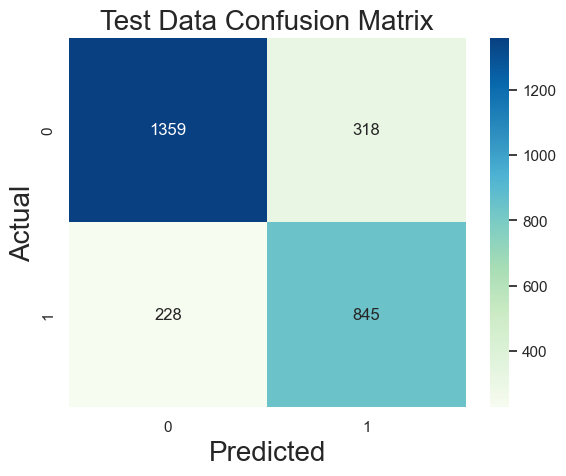

In [203]:
# Plotting confusion matrix:-
sns.heatmap(confusion2, annot=True,fmt='g',cmap='GnBu')
plt.title("Test Data Confusion Matrix", fontsize=20)
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [204]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [205]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7875116495806151

In [206]:
# Let us calculate specificity:-

TN / float(TN+FP)

0.8103756708407871

In [207]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert

FP/ float(TN+FP)

0.18962432915921287

In [208]:
# positive predictive value 

print (TP / float(TP+FP))

0.7265692175408427


In [209]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8563327032136105


## Precision and Recall for Test dataset


In [210]:
# Calculating 'precision_score'

precision_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7265692175408427

In [211]:
#Calculating 'recall_score'

recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7875116495806151

## Observation
The sensitivity value for test data is 79% while for train data is also 79% . The accuracy values is ~ 80%. Which shows that model is performing well for test data set also.

## Determining top feature based on final model (logm8)


In [212]:
# Displaying parameters obtained by final model 'logm8'

pd.options.display.float_format = '{:.2f}'.format # Setting format option
logm8.params[1:]

Lead Source_Olark Chat                                  1.34
Lead Source_Reference                                   3.52
Lead Source_Welingak Website                            5.79
Last Activity_Email Opened                              0.65
Last Activity_Olark Chat Conversation                  -0.91
Last Activity_Others                                    1.20
Last Activity_SMS Sent                                  1.79
What is your current occupation_Student                 0.40
What is your current occupation_Working Professional    2.57
Specialization_Not Specified                           -0.64
Do Not Email                                           -1.38
Total Time Spent on Website                             1.06
A free copy of Mastering The Interview                 -0.49
dtype: float64

In [213]:
# Getting a relative coefficient value for all the features wrt the feature with the highest coefficient
top_feature = logm8.params[1:]
top_feature = 100.0 * (top_feature / top_feature.max())

# Print title
print("-----------------------Top Features -----------------------\n")

# Print relative coefficient values
print(top_feature)

-----------------------Top Features -----------------------

Lead Source_Olark Chat                                  23.09
Lead Source_Reference                                   60.86
Lead Source_Welingak Website                           100.00
Last Activity_Email Opened                              11.21
Last Activity_Olark Chat Conversation                  -15.72
Last Activity_Others                                    20.70
Last Activity_SMS Sent                                  31.01
What is your current occupation_Student                  6.85
What is your current occupation_Working Professional    44.37
Specialization_Not Specified                           -11.04
Do Not Email                                           -23.83
Total Time Spent on Website                             18.23
A free copy of Mastering The Interview                  -8.51
dtype: float64


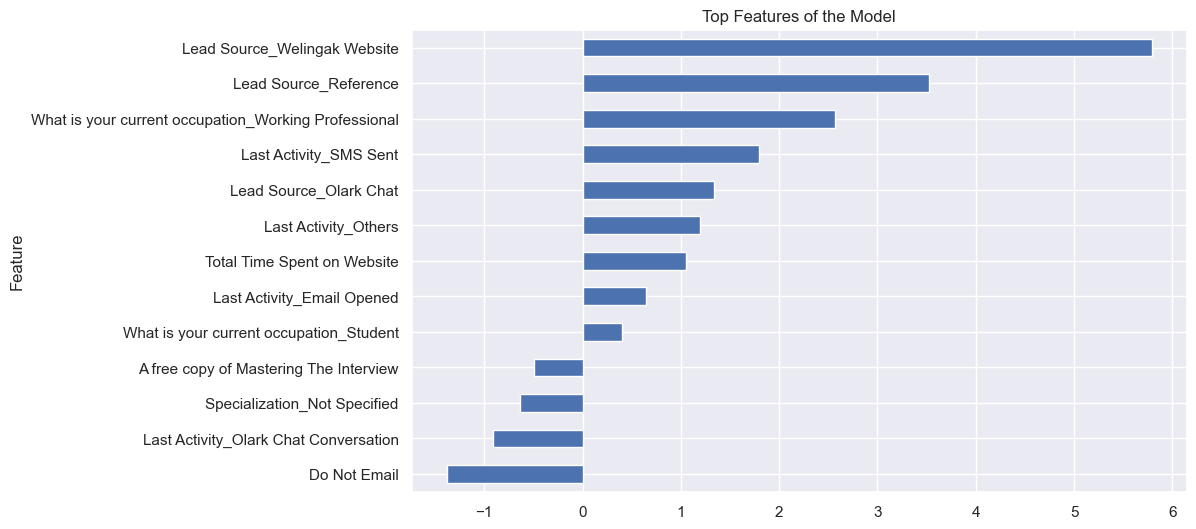

In [214]:
# Getting the top features and their coefficients
top_features = logm8.params[1:].sort_values(ascending=True)

# Sorting the coefficients and top features together
top_features_sorted = top_features.sort_values()
coefficients_sorted = logm8.params[top_features_sorted.index]


# Plotting the top features
plt.figure(figsize=(10, 6))
coefficients_sorted.plot(kind='barh')
plt.ylabel('Feature')

plt.title('Top Features of the Model')
plt.show()

## Final Observation
Evaluation Metrics for the train Dataset:-

Accuracy : 80%

Sensitivity : 79%

Specificity : 80%

Pricision: 72%

Recall: 79%



Evaluation Metrics for the test Dataset:-

Accuracy : 0.80

Sensitivity:  0.78

Specificity: 0.81

Precision: 0.72

Recall:~ 0.79

NOTE: The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

The model achieved a sensitivity of 79.63% in the train set and 78.75% in the test set, using a cut-off value of 0.358.
Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting
The CEO of X Education had set a target sensitivity of around 80%.
The model also achieved an accuracy of 80.46%, which is in line with the study's objectives.

## Model parameters

The final Logistic Regression Model has 15 features

Top 3 features that contributing positively to predicting hot leads in the model are:

1. Lead Source_Welingak Website

2. Lead Source_Reference

3. What is your current occupation_Working Professional


## Recommendation:

To improve the potential lead conversion rate X-Education will have to mainly focus important features responsible for good conversion rate are :-

Lead Source_Welingak Website : As conversion rate is higher for those leads who got to know about course from 'Welingak Website',so company can focus on this website to get more number of potential leads.

Lead Origin_Lead Add Form: Leads who have engaged through 'Lead Add Form' having higher conversion rate so company can focus on it to get more number of leads cause have a higher chances of getting converted.

What is your current occupation_Working Professional : The lead whose occupation is 'Working Professional' having higher lead conversion rate ,company should focus on working professionals nad try to get more number of leads.

Last Activity_SMS Sent: Lead whose last activity is sms sent can be potential lead for company.

Total Time Spent on website: Leads spending more time on website can be our potential lead.
